<a name="top"></a>
# Project 1: SAT & ACT Analysis

## Problem Statement
After the revamp of the SAT examination in 2016, the participation rates in many US States is seen to be varied. In our analysis, we would be finding out which state would require more funding to improve their SAT participation rates. We would also back-up the decision with concrete evidence and what are the methods that can be used to improve the participation rate. 

## Executive Summary
Firstly, all the datasets for the standardized testing were cleaned, missing values were placed in, data entry errors were checked. Following the cleaning process, all the 4 datasets were compiled into one big dataset. The big dataset was grouped according to US states. Such grouping would help us to make state-level comparison for both the standardized tests. Next, we utilized masking techniques to analyze the data at a much more granular level to get a rough picture of the dataset. Masking the data is a form of filtering. Hence, masking allowed us to observe the data better. After we had done a rough analysis of the data, we moved to visualizing the data to get a deep understanding of the trends for both the exams. With a deep understanding of the data, we ventured on to state the trends that we had observed. We also did outside research to explain some of the trends that we observed to make a better decision. Lastly , we wrapped up the report by concluding the findings and recommended that the one state that should be chosen to receive the funding to increase the SAT participation. 



### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import math
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv("sat_2017.csv")
act_2017 = pd.read_csv('act_2017.csv')



#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
first_10_sat_2017_rows = sat_2017.head(n=10)

first_10_sat_2017_rows


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
first_10_act_2017_rows = act_2017.head(n=10)

first_10_act_2017_rows

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:** For both the sat_2017 and act_2017 data the average score among the American states seem to be will dispersed. Further, in both the sat_2017  and the act_2017  data, the percentage of participation is highly varried among all the states.

#### 4a. Does the data look complete? 

**Answer:** Upon further analysis, it came to my understanding that there were some discrepancies in both the sat_2017 and act_2017 file. Firstly , in the sat_2017 file, the main discrepancies were the wrong total values. The total values might be inaccurate due to the data entry errors in the specific subject score. Secondly, in the act_2017 file there was errors in the entry of composite scores. Morever, the act_2017 composite score is meant to be a whole number not a decimal as shown in the 2017 act_file. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:** We need to ensure that the total score in the sat_2017 data is accurate. Furthermore, we need to fix the composite score in the act_2017 file to become a whole number.

According to the collegeboard website, the minimum total score for two subjects in SAT is 400 and the maximum is 1600.However, the minimum individual score for each subject in SAT is 200 while the maximum score is 800(link_1).

The understanding your ACT score section within the official ACT website states that the minimum score for all the subjects and the composite(average) score is 1, whereas, the maximum score is 36(link_2). 

link_1 = https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/structure 


link_2 = https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html

#### 4c. Fix any errors you identified



In [5]:
#One way we can find out major errors is through running all the columns thru a describe method of DataFrame

#To observe the spread of all the columns in the act_2017 , DataFrame

act_2017[['Participation', 'English' , 'Math' , 'Reading', 'Science', 'Composite']].describe() 


#Through the dscribe method we are able to observe if there are any obvious anomlies by focusing on the min and max values



,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [6]:
'''
After observing the spread of the whole DataFrame act_2017,
it seems odd to have such a low minimum science score as compared to the other scores. 
Thus we will be taking a closer look at where the mistake lies 
'''
act_2017['Science'] < 3 #This shows us that the 21st row has the issue


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
Name: Science, dtype: bool

In [7]:
#We proceed to correct the error by assigning the 21st science score to be that of the median.

act_2017.iloc[21 , 5] = 21.2
act_2017.iloc[21] #To check whether the value was changed accordingly

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              21.2
Composite            23.6
Name: 21, dtype: object

In [8]:
#Now, let us take a look at the spread of all the data in the sat_2017 DataFrame to observe if there are any errors.
sat_2017[['Participation', 'Evidence-Based Reading and Writing' , 'Math' , 'Total']].describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [9]:
#The minimum value off Math seems to be wrong as the minimum score of a SAT subject is 400
sat_2017["Math"] < 400

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
Name: Math, dtype: bool

In [10]:
#Let's check if the incorrect math score might be a data entry error
#If we subtract the total score by the English score, we might be able to get the Math score
sat_2017.iloc[20, 3] = sat_2017.iloc[20 , 4] - sat_2017.iloc[20,2] 

sat_2017.iloc[20,3] 
#The entry for the Math section was stated to be 52, which suggests that it was a entry error as the math score is 524

524

In [11]:
#The Composite Score is meant to be a whole number. Thus, we are rounding the numbers accordinly
i = 0
for index in range(len(act_2017)):
    y = (act_2017.iloc[i,2]+ act_2017.iloc[i,3]+act_2017.iloc[i,4]+act_2017.iloc[i,5]) / 4
    act_2017.iloc[i,6] = (round(y))
    i+= 1

#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
#Finding data types of features in act_2017
act_2017.dtypes


State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite          int64
dtype: object

In [13]:
#Finding data types of features in sat_17
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:** Some of the data types do not correspond with the column label for both these data frames. The participation column needs to be changed to become a float. Whearas, the composite score in the act_2017 file needs to be a integer. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:

def replacements (s):
    replaced = s.replace('%' , '')
    return float(replaced)



act_2017['Participation'] = act_2017['Participation'].apply(replacements)

sat_2017['Participation'] = sat_2017['Participation'].apply(replacements)




In [15]:
#Changing the Composite Data Colums to become an integer as stated in collegeboard

act_2017["Composite"] = act_2017["Composite"].astype('int') 



- Fix any individual values preventing other columns from being the appropriate type.

In [16]:
#Nothing else to change

- Finish your data modifications by making sure the columns are now typed appropriately.

In [17]:
#code
act_2017.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.403846,21.403846
std,31.832518,2.332132,1.963602,2.048672,1.705580,2.002544
min,8.000000,16.300000,18.000000,18.100000,18.200000,18.000000
25%,31.000000,19.000000,19.400000,20.475000,19.975000,20.000000
50%,68.000000,20.550000,20.900000,21.700000,21.250000,21.000000
75%,100.000000,23.300000,23.100000,24.125000,22.525000,23.250000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.000000


In [18]:
sat_2017.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


- Display the data types again to confirm they are correct.

In [19]:
#Code:
act_2017.dtypes #To find out the data types of act_2017


State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite          int64
dtype: object

In [20]:
sat_2017.dtypes #To find out the data types of sat_2017

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
#code
act_2017.columns = ['act_2017_state' , 'act_2017_participation', 'act_2017_english', 'act_2017_math', 'act_2017_reading', 'act_2017_science', 'act_2017_composite']

act_2017.head() #To check whether the columns have been assigned properly 

,act_2017_state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,60.0,20.3,20.7,21.4,21.0,21
1,Alabama,100.0,18.9,18.4,19.7,19.4,19
2,Alaska,65.0,18.7,19.8,20.4,19.9,20
3,Arizona,62.0,18.6,19.8,20.1,19.8,20
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19


In [22]:
sat_2017.columns = ['sat_2017_state', 'sat_2017_participation', 'sat_2017_reading_n_writing', 'sat_2017_math', 'sat_2017_total']

sat_2017.head()#To check whether the columns have been assigned properly 

,sat_2017_state,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,sat_2017_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|act_2017|Specific States within America which has taken ACT & SAT |
|act_2017_participation|float|act_2017|Participation rate based on the percentage of students taking the ACT |
|act_2017_english|int|act_2017|Average English Score for students in that state  |
|act_2017_math|int|act_2017|Average Math Score for students in that state |
|act_2017_science|int|act_2017|Average Science score for students in that state |
|act_2017_composite|int|act_2017|Average composite score|
|sat_2017_participation|float|sat_2017| Participation rate baesed on the percentage of students taking the SAT|
|sat_2017_reading_n_writing|float|sat_2017| Average English SAT score for students in that state|
|sat_2017_math|float|sat_2017| Average Math SAT score for students in that state|
|sat_2017_total|float|sat_2017| Average Total SAT score for students in that state|
|act_2018_participation|float|act_2018|Participation rate based on the percentage of students taking the ACT |
|act_2018_english|int|act_2018|Average English Score for students in that state  |
|act_2018_math|int|act_2018|Average Math Score for students in that state |
|act_2018_science|int|act_2018|Average Science score for students in that state |
|act_2018_composite|int|act_2018|Average composite score|
|sat_2018_participation|float|sat_2018| Participation rate baesed on the percentage of students taking the SAT|
|sat_2018_reading_n_writing|float|sat_2018| Average English SAT score for students in that state|
|sat_2018_math|float|sat_2018| Average Math SAT score for students in that state|
|sat_2018_total|float|sat_2018| Average Total SAT score for students in that state|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [23]:
#Remove national from the DataFrame
act_2017.drop(0, axis = 0, inplace = True)


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [24]:
combine = act_2017.merge(sat_2017.rename(columns = {'sat_2017_state' : 'act_2017_state'}, ))

combine.rename(columns = {"act_2017_state" : 'state'} , inplace =True) #Merging 2 DataFrames into 1

combine.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,sat_2017_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,20,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,20,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,23,53.0,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [25]:
#code
combine.to_csv('combined_2017.csv') #Saving it as a local CSV file


[Back to top](#top)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [26]:
#Reading the appropriate files
#link to the act_2018 results : https://magoosh.com/hs/act/2016/average-act-score-by-state/
#link to the sat_2018 results : https://blog.prepscholar.com/average-sat-scores-by-state-most-recent

act_2018 = pd.read_csv('act_2018.csv')
sat_2018 = pd.read_csv('sat_2018.csv')

In [27]:
#Display data for act_2018
act_2018.head(n = 10)

,State,Percentage of Students Tested,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7
5,Colorado,30,23.9,23.2,24.4,23.5,23.9
6,Connecticut,26,26.0,24.8,26.1,24.9,25.6
7,Delaware,17,23.7,23.1,24.5,23.4,23.2
8,District of Columbia,32,23.7,22.7,24.4,23.0,23.6
9,Florida,66,19.2,19.3,21.1,19.5,19.9


In [28]:
#Display the data for sat_2018
sat_2018.head(n = 10)

,State,Participation Rate,EBRW,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,97%,522,493,1014


**Verbally Describe the data:** Some of the percentage of students attempting the ACTS is not given in some states. Moreover, the composite score for ACT is not a whole number. The ACT file also has an extra row for the national average. Meanwhile, in the sat_2018 file, we can see that most of the scores are  well disperesed and there arent any empty fields. 

In [29]:
#Check to make sure all the values are correct
act_2018.describe()

,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,20.958491,21.101887,21.988679,21.320755,21.460377
std,2.403638,1.999855,2.129614,1.837992,2.069591
min,16.600000,17.800000,18.000000,17.900000,17.700000
25%,19.100000,19.400000,20.500000,20.000000,20.000000
50%,20.200000,20.600000,21.300000,20.800000,20.800000
75%,23.700000,23.100000,24.000000,23.000000,23.500000
max,26.000000,25.200000,26.100000,24.900000,25.600000


In [30]:
#Lets look if the data types of the columns are correct 
act_2018.dtypes

State                             object
Percentage of Students Tested     object
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
Average Composite Score          float64
dtype: object

In [31]:
#The composite score in the act_2018 is still a float.Thus we will need to round the values accordingly.
i = 0
for index in range(len(act_2018)):
    y = (act_2018.iloc[i,2]+ act_2018.iloc[i,3]+act_2018.iloc[i,4]+act_2018.iloc[i,5]) / 4
    act_2018.iloc[i,6] = (round(y))
    i+= 1
    
act_2018['Average Composite Score'] = act_2018['Average Composite Score'].astype("int")

In [32]:
#To find out which rows are empty
act_2018['Percentage of Students Tested'] == 'Not given'


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34     True
35    False
36    False
37     True
38    False
39     True
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52     True
Name: Percentage of Students Tested, dtype: bool

In [33]:
#Change the unknown values to be zero, such that we are able to find the median and then we would be able to substitute the results accordingly
act_2018.loc[(18, 27, 34, 37, 39, 52), 'Percentage of Students Tested'] = 0.0

act_2018.loc[34] #To check whether the values have changed accordingly


State                            North Carolina
Percentage of Students Tested                 0
Average English Score                        18
Average Math Score                         19.3
Average Reading Score                      19.5
Average Science Score                      19.2
Average Composite Score                      19
Name: 34, dtype: object

In [34]:
#Change the percentage of students into a float
act_2018["Percentage of Students Tested"] = act_2018["Percentage of Students Tested"].astype("float")
act_2018.describe()


,Percentage of Students Tested,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,53.283019,20.958491,21.101887,21.988679,21.320755,21.320755
std,36.957032,2.403638,1.999855,2.129614,1.837992,2.064103
min,0.000000,16.600000,17.800000,18.000000,17.900000,18.000000
25%,24.000000,19.100000,19.400000,20.500000,20.000000,20.000000
50%,42.000000,20.200000,20.600000,21.300000,20.800000,21.000000
75%,100.000000,23.700000,23.100000,24.000000,23.000000,23.000000
max,100.000000,26.000000,25.200000,26.100000,24.900000,25.000000


In [35]:
#After observing that the median of the Percentage of stuedents tested is 42.75. We need to replace all the empty cells with the median value
act_2018.loc[(18,27,34,37,39,52), 'Percentage of Students Tested'] = 42.75


In [36]:
act_2018.dtypes

State                             object
Percentage of Students Tested    float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
Average Composite Score            int64
dtype: object

In [37]:
#The national score is not needed. Thus we would be removing that specific row
act_2018.drop(52 , inplace =True)

In [38]:
#To observe whether the last "National" row has been removed
act_2018.tail()

,State,Percentage of Students Tested,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score
47,Virginia,24.0,23.8,23.3,24.7,23.5,24
48,Washington,24.0,21.4,22.2,22.7,22.0,22
49,West Virginia,65.0,19.8,19.4,21.3,20.4,20
50,Wisconsin,100.0,19.8,20.3,20.6,20.8,20
51,Wyoming,100.0,19.0,19.7,20.6,20.3,20


In [39]:
#Now lets move on to correct the sat_2018 file 
sat_2018.describe()
#The minimum and maximum values seem to be inside the range of scores that is expexted from the SAT exam

,EBRW,Math,Total
count,51.000000,51.000000,51.000000
mean,567.294118,557.470588,1125.294118
std,45.317676,49.213963,94.442214
min,497.000000,480.000000,977.000000
25%,535.000000,521.500000,1062.500000
50%,552.000000,547.000000,1099.000000
75%,616.500000,600.500000,1229.500000
max,643.000000,655.000000,1298.000000


In [40]:
#The participation scores in the sat_2018 file is in percentage. We would need to remove the percentage sign
#Using the previous defined function , replacements , we have removed the percentage sign
sat_2018['Participation Rate'] = sat_2018['Participation Rate'].apply(replacements) 
sat_2018['Participation Rate'] = sat_2018['Participation Rate'].astype("float")

In [41]:
#We will check on the data types of sat_2018
sat_2018.dtypes

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

In [42]:
#To ensure there arent any data entry errors, lets check if the sum of both the test scores gives us the total score
#We can ommit the total difference when its between -1 and +1
differ_total_score = (sat_2018["Total"] - (sat_2018["EBRW"] + sat_2018['Math']))
sat_2018[ (differ_total_score < -1 )]


,State,Participation Rate,EBRW,Math,Total
50,Wyoming,3.0,633,635,1257


In [43]:
sat_2018.iloc[50,4] = sat_2018.iloc[50,3] +sat_2018.iloc[50,2] #Replacing Total Score for Wyoming

In [44]:
sat_2018 [differ_total_score > 1 ]

,State,Participation Rate,EBRW,Math,Total
26,Montana,10.0,606,592,1229


In [45]:
sat_2018.iloc[26,4] = sat_2018.iloc[26,3] +sat_2018.iloc[26,2] #Replacing the total score for Montana State

In [46]:
#code
act_2018.columns = ['state' , 'act_2018_participation', 'act_2018_english', 'act_2018_math', 'act_2018_reading', 'act_2018_science', 'act_2018_composite']

act_2018.head() #To check whether the columns have been assigned properly 

,state,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,100.0,18.9,18.3,19.6,19.0,19
1,Alaska,33.0,19.8,20.6,21.6,20.7,21
2,Arizona,66.0,18.2,19.4,19.5,19.2,19
3,Arkansas,100.0,19.1,18.9,19.7,19.4,19
4,California,27.0,22.5,22.5,23.0,22.1,23


In [47]:
sat_2018.columns = ['state', 'sat_2018_participation' , 'sat_2018_reading_n_writing', 'sat_2018_math', 'sat_2018_total']
sat_2018.head()#To check whether the columns have been assigned properly 

,state,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [48]:
combine_2018 = act_2018.merge(sat_2018) 

combine_2018.rename(columns = {"act_2017_state" : 'state'} , inplace =True) #Merging both the 2018 tests first

combine_2018.head()

,state,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,18.9,18.3,19.6,19.0,19,6.0,595,571,1166
1,Alaska,33.0,19.8,20.6,21.6,20.7,21,43.0,562,544,1106
2,Arizona,66.0,18.2,19.4,19.5,19.2,19,29.0,577,572,1149
3,Arkansas,100.0,19.1,18.9,19.7,19.4,19,5.0,592,576,1169
4,California,27.0,22.5,22.5,23.0,22.1,23,60.0,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [49]:
final_combine = combine.merge(combine_2018) #Merging into a big DataFrame
final_combine.to_csv('final.csv') #Saving as a local CSV file
final_combine.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19,5.0,593,572,...,100.0,18.9,18.3,19.6,19.0,19,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,20,38.0,547,533,...,33.0,19.8,20.6,21.6,20.7,21,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,20,30.0,563,553,...,66.0,18.2,19.4,19.5,19.2,19,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19,3.0,614,594,...,100.0,19.1,18.9,19.7,19.4,19,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,23,53.0,531,524,...,27.0,22.5,22.5,23.0,22.1,23,60.0,540,536,1076


[Back to top](#top)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
#Code:
y = final_combine.describe().T


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
def std_dev(value):
    number = len(value)
    mean = (sum(value))/number
    total=0
    for y in value:
        op_1 =  (y-mean) **2
        total += op_1
    var = total/number
    std_d = math.sqrt(var)

    return std_d

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [52]:
#Code:
sd = {f:std_dev(final_combine[f]) for f in final_combine.columns[1:21]}
sd

{'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7046242825434228,
 'act_2017_composite': 2.0017293561380654,
 'sat_2017_participation': 34.92907076664508,
 'sat_2017_reading_n_writing': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 32.21295770908891,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'act_2018_composite': 2.083235291810733,
 'sat_2018_participation': 37.63965409204986,
 'sat_2018_reading_n_writing': 44.87118561762388,
 'sat_2018_math': 48.72908417723463,
 'sat_2018_total': 93.25366100198411}

In [53]:
#Calculating std based on the numpy function
np.std(final_combine)

act_2017_participation        31.824176
act_2017_english               2.330488
act_2017_math                  1.962462
act_2017_reading               2.046903
act_2017_science               1.704624
act_2017_composite             2.001729
sat_2017_participation        34.929071
sat_2017_reading_n_writing    45.216970
sat_2017_math                 46.657134
sat_2017_total                91.583511
act_2018_participation        32.212958
act_2018_english               2.422254
act_2018_math                  2.015707
act_2018_reading               2.145892
act_2018_science               1.851689
act_2018_composite             2.083235
sat_2018_participation        37.639654
sat_2018_reading_n_writing    44.871186
sat_2018_math                 48.729084
sat_2018_total                93.253661
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:** The manually calculated std deviations are similar to that of the numpy std method. However both the manually colelcted and the numpy std values are slightly lower than the std output from pandas describe function. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [54]:
#code

final_combine.sort_values(['act_2017_participation'] , ascending = True ).head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
19,Maine,8.0,24.2,24.0,24.8,23.7,24,95.0,513,499,...,7.00,23.8,23.6,24.7,23.4,24,99.0,512,501,1013
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25,96.0,532,520,...,16.00,25.1,24.7,25.6,24.4,25,96.0,535,528,1063
7,Delaware,18.0,24.1,23.4,24.8,23.6,24,100.0,503,492,...,17.00,23.7,23.1,24.5,23.4,24,100.0,505,492,998
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24,71.0,539,524,...,15.00,24.4,23.6,25.0,23.5,24,97.0,513,505,1018
38,Pennsylvania,23.0,23.4,23.4,24.2,23.3,24,65.0,540,531,...,42.75,23.3,23.2,24.0,23.1,23,70.0,547,539,1086


The states with the least participation rates for the act_2017 exams are:
Maine, New Hampshire, Delware, Rhode Island and Pennsylvania. 

In [55]:
final_combine.sort_values(['act_2018_participation'] , ascending = True ).tail()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
24,Mississippi,100.0,18.2,18.1,18.8,18.8,18,2.0,634,607,...,100.0,18.2,18.1,18.9,18.6,18,3.0,630,606,1236
17,Kentucky,100.0,19.6,19.4,20.5,20.1,20,4.0,631,616,...,100.0,19.9,19.7,20.8,20.1,20,4.0,630,618,1248
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19,3.0,614,594,...,100.0,19.1,18.9,19.7,19.4,19,5.0,592,576,1169
40,South Carolina,100.0,17.5,18.6,19.1,18.9,19,50.0,543,521,...,100.0,17.3,18.2,18.6,18.5,18,55.0,547,523,1070
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20,3.0,626,604,...,100.0,19.0,19.7,20.6,20.3,20,3.0,633,635,1268


The states with the highest participation rates in 2018 ACT  act are: Mississipi , Kentucky, Arkansas, South Carolina and Wyoming. We shouldn't focus too much of our attention on these states. Other than Arkansas, the other states have mandatory ACT testing. 


In [56]:
masking = (final_combine['sat_2017_participation'] == 100)
final_combine[masking]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25,100.0,530,512,...,26.0,26.0,24.8,26.1,24.9,25,100.0,535,519,1053
7,Delaware,18.0,24.1,23.4,24.8,23.6,24,100.0,503,492,...,17.0,23.7,23.1,24.5,23.4,24,100.0,505,492,998
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24,100.0,482,468,...,32.0,23.7,22.7,24.4,23.0,23,92.0,497,480,977
22,Michigan,29.0,24.1,23.7,24.5,23.8,24,100.0,509,495,...,22.0,24.5,23.9,24.7,23.9,24,100.0,511,499,1011


4 states have 100% Participation in 2017 for SAT examinations.

In [57]:
masking_18 = (final_combine['sat_2018_participation'] == 100)
final_combine[masking_18]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
5,Colorado,100.0,20.1,20.3,21.2,20.9,21,11.0,606,595,...,30.0,23.9,23.2,24.4,23.5,24,100.0,519,506,1025
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25,100.0,530,512,...,26.0,26.0,24.8,26.1,24.9,25,100.0,535,519,1053
7,Delaware,18.0,24.1,23.4,24.8,23.6,24,100.0,503,492,...,17.0,23.7,23.1,24.5,23.4,24,100.0,505,492,998
12,Idaho,38.0,21.9,21.8,23.0,22.1,22,93.0,513,493,...,36.0,21.9,21.6,23.2,22.1,22,100.0,508,493,1001
22,Michigan,29.0,24.1,23.7,24.5,23.8,24,100.0,509,495,...,22.0,24.5,23.9,24.7,23.9,24,100.0,511,499,1011


There is an increase in the number of states with 100% particpation for SAT in 2018. 

In [58]:
mask_2 = ((final_combine["sat_2018_participation"] == 100) & (final_combine['sat_2017_participation'] == 100) )
final_combine[mask_2]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25,100.0,530,512,...,26.0,26.0,24.8,26.1,24.9,25,100.0,535,519,1053
7,Delaware,18.0,24.1,23.4,24.8,23.6,24,100.0,503,492,...,17.0,23.7,23.1,24.5,23.4,24,100.0,505,492,998
22,Michigan,29.0,24.1,23.7,24.5,23.8,24,100.0,509,495,...,22.0,24.5,23.9,24.7,23.9,24,100.0,511,499,1011


There are only 3 states which have 100% participation rate in SAT exams in 2017 and 2018. All these 3 states have mandatory SAT testing. Efforts to increase SAT participation in these states is not required.

In [59]:
final_combine.sort_values(['sat_2018_participation'] , ascending = True ).head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
34,North Dakota,98.0,19.0,20.4,20.5,20.6,20,2.0,635,621,...,98.0,19.1,20.3,20.7,20.5,20,2.0,640,643,1283
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20,3.0,626,604,...,100.0,19.0,19.7,20.6,20.3,20,3.0,633,635,1268
41,South Dakota,80.0,20.7,21.5,22.3,22.0,22,3.0,612,603,...,77.0,20.8,21.6,22.4,22.2,22,3.0,622,618,1241
27,Nebraska,84.0,20.9,20.9,21.9,21.5,21,3.0,629,625,...,100.0,19.4,19.8,20.4,20.1,20,3.0,629,623,1252
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20,3.0,642,649,...,100.0,19.8,20.3,20.6,20.8,20,3.0,641,653,1294


The lowest Percentage Participation  2018 SAT is in the following states:
North Dakota, Wyoming, South Dakota, Neberaska and Wisconsin.
Among the above mentioned states, all the states other than South Dakota requires a mandatory ACT.
Therefore, we can look into having more efforts geared towards increasing the SAT participation in South Dakota.

In [60]:
final_combine.sort_values(["act_2017_participation", 'sat_2017_participation'] , ascending = (True, False)).tail()
#Highest ACT with Lowest SAT participation

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
25,Missouri,100.0,19.8,19.9,20.8,20.5,20,3.0,640,631,...,100.0,19.5,19.7,20.5,20.0,20,4.0,633,629,1262
44,Utah,100.0,19.5,19.9,20.8,20.6,20,3.0,624,614,...,100.0,19.7,19.9,20.9,20.5,20,4.0,618,612,1230
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20,3.0,642,649,...,100.0,19.8,20.3,20.6,20.8,20,3.0,641,653,1294
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20,3.0,626,604,...,100.0,19.0,19.7,20.6,20.3,20,3.0,633,635,1268
24,Mississippi,100.0,18.2,18.1,18.8,18.8,18,2.0,634,607,...,100.0,18.2,18.1,18.9,18.6,18,3.0,630,606,1236


In [61]:
final_combine.sort_values(["act_2017_participation", 'sat_2017_participation'] , ascending = (True, False)).head()
#Lowest ACT with Highest SAT participation

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
19,Maine,8.0,24.2,24.0,24.8,23.7,24,95.0,513,499,...,7.00,23.8,23.6,24.7,23.4,24,99.0,512,501,1013
7,Delaware,18.0,24.1,23.4,24.8,23.6,24,100.0,503,492,...,17.00,23.7,23.1,24.5,23.4,24,100.0,505,492,998
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25,96.0,532,520,...,16.00,25.1,24.7,25.6,24.4,25,96.0,535,528,1063
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24,71.0,539,524,...,15.00,24.4,23.6,25.0,23.5,24,97.0,513,505,1018
38,Pennsylvania,23.0,23.4,23.4,24.2,23.3,24,65.0,540,531,...,42.75,23.3,23.2,24.0,23.1,23,70.0,547,539,1086


In 2017, States which have high participation rates in act have very low participation rates in sat. The observation is vice versa.

In [62]:
mask_2017 = ((final_combine['act_2017_participation']>= 50) & (final_combine['sat_2017_participation'] >=50))
final_combine[mask_2017]


,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
9,Florida,73.0,19.0,19.4,21.0,19.4,20,83.0,520,497,...,66.0,19.2,19.3,21.1,19.5,20,97.0,522,493,1014
10,Georgia,55.0,21.0,20.9,22.0,21.3,21,61.0,535,515,...,53.0,20.9,20.7,21.2,21.4,21,70.0,542,522,1064
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19,55.0,544,541,...,89.0,18.2,19.0,19.1,19.0,19,56.0,550,549,1099
40,South Carolina,100.0,17.5,18.6,19.1,18.9,19,50.0,543,521,...,100.0,17.3,18.2,18.6,18.5,18,55.0,547,523,1070


4 states have at least 50% particiaption for both the ACT and the SAT exams in 2017

In [63]:
mask_2018 = ((final_combine['act_2018_participation']>= 50) & (final_combine['sat_2018_participation'] >=50))
final_combine[mask_2018]


,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
9,Florida,73.0,19.0,19.4,21.0,19.4,20,83.0,520,497,...,66.0,19.2,19.3,21.1,19.5,20,97.0,522,493,1014
10,Georgia,55.0,21.0,20.9,22.0,21.3,21,61.0,535,515,...,53.0,20.9,20.7,21.2,21.4,21,70.0,542,522,1064
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19,55.0,544,541,...,89.0,18.2,19.0,19.1,19.0,19,56.0,550,549,1099
40,South Carolina,100.0,17.5,18.6,19.1,18.9,19,50.0,543,521,...,100.0,17.3,18.2,18.6,18.5,18,55.0,547,523,1070


All the same states that had more than 50% participation rate for both examinations in 2017, have more than 50% participation rate in both the exams in 2018 as well! Thus, Florida, Georgia, Hawaii and South Carolina should not be considered for receiving fudning to improve the participation rates as there is already a moderate amount of  participation in these states. 

In [64]:
mask_lower_2017 = ((final_combine['act_2017_participation']< 50) & (final_combine['sat_2017_participation'] <50))
final_combine[mask_lower_2017]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
37,Oregon,40.0,21.2,21.5,22.4,21.7,22,43.0,560,548,...,42.0,20.6,20.9,21.9,21.1,21,48.0,564,553,1117


**I would focus on Oregon. In 2017, Oregon has lower than 50% of students participating in both the exams.**


In [65]:
mask_lower_2018 = ((final_combine['act_2018_participation']< 50) & (final_combine['sat_2018_participation'] <50))
final_combine[mask_lower_2018]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
1,Alaska,65.0,18.7,19.8,20.4,19.9,20,38.0,547,533,...,33.00,19.8,20.6,21.6,20.7,21,43.0,562,544,1106
18,Louisiana,100.0,19.4,18.8,19.8,19.6,19,4.0,611,586,...,42.75,19.0,18.5,19.6,19.1,19,4.0,615,595,1210
36,Oklahoma,100.0,18.5,18.8,20.1,19.6,19,7.0,530,517,...,42.75,18.4,18.8,20.1,19.4,19,8.0,541,521,1062
37,Oregon,40.0,21.2,21.5,22.4,21.7,22,43.0,560,548,...,42.00,20.6,20.9,21.9,21.1,21,48.0,564,553,1117


In 2018, there is an increase in the number of states which have percentages lower than 50 for both the exams.
Oregon is showing up for both years.

The states which have less than 50% participation rate would be interesting as we would want to find out why they have such a low particiaption rate in both the exams.
For both Louisiana and Oklahoma they had a 100% participation rate during their act 2017 examinations but dropped significantly to below 50% in the follwing year. 

In [66]:
mask_sat = ((final_combine['sat_2017_participation']<50) & (final_combine['sat_2018_participation']>50))
final_combine[mask_sat]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_n_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_n_writing,sat_2018_math,sat_2018_total
5,Colorado,100.0,20.1,20.3,21.2,20.9,21,11.0,606,595,...,30.00,23.9,23.2,24.4,23.5,24,100.0,519,506,1025
13,Illinois,93.0,21.0,21.2,21.6,21.3,21,9.0,559,556,...,43.00,24.1,23.4,24.2,23.4,24,99.0,513,506,1019
33,North Carolina,100.0,17.8,19.3,19.6,19.3,19,49.0,546,535,...,42.75,18.0,19.3,19.5,19.2,19,52.0,554,543,1098


We should not be focusing the following states as they have increased participation rates from below 50% to above 50% in the duration of just 1 year(2017-2018):

Colarado, Illonois and North Carolina(Not a drastic Change)

There seems to a drastic change in the participation rates of Illinois and Colardo as there is a state level enforcement that the students in both states are required to take the SAT from 2018 according to the article from prep scholar (1). These state level decisions are hard to achieve but as seen from this table, they are the most effective solution to increase the participation rates of the SATs.

(1) - https://blog.prepscholar.com/act-vs-sat

**The states that I would be focusing on are Oklahoma, Oregon and _**

[Back to top](#top)

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Correlation of ACT and SAT for the years 2017 & 2018')

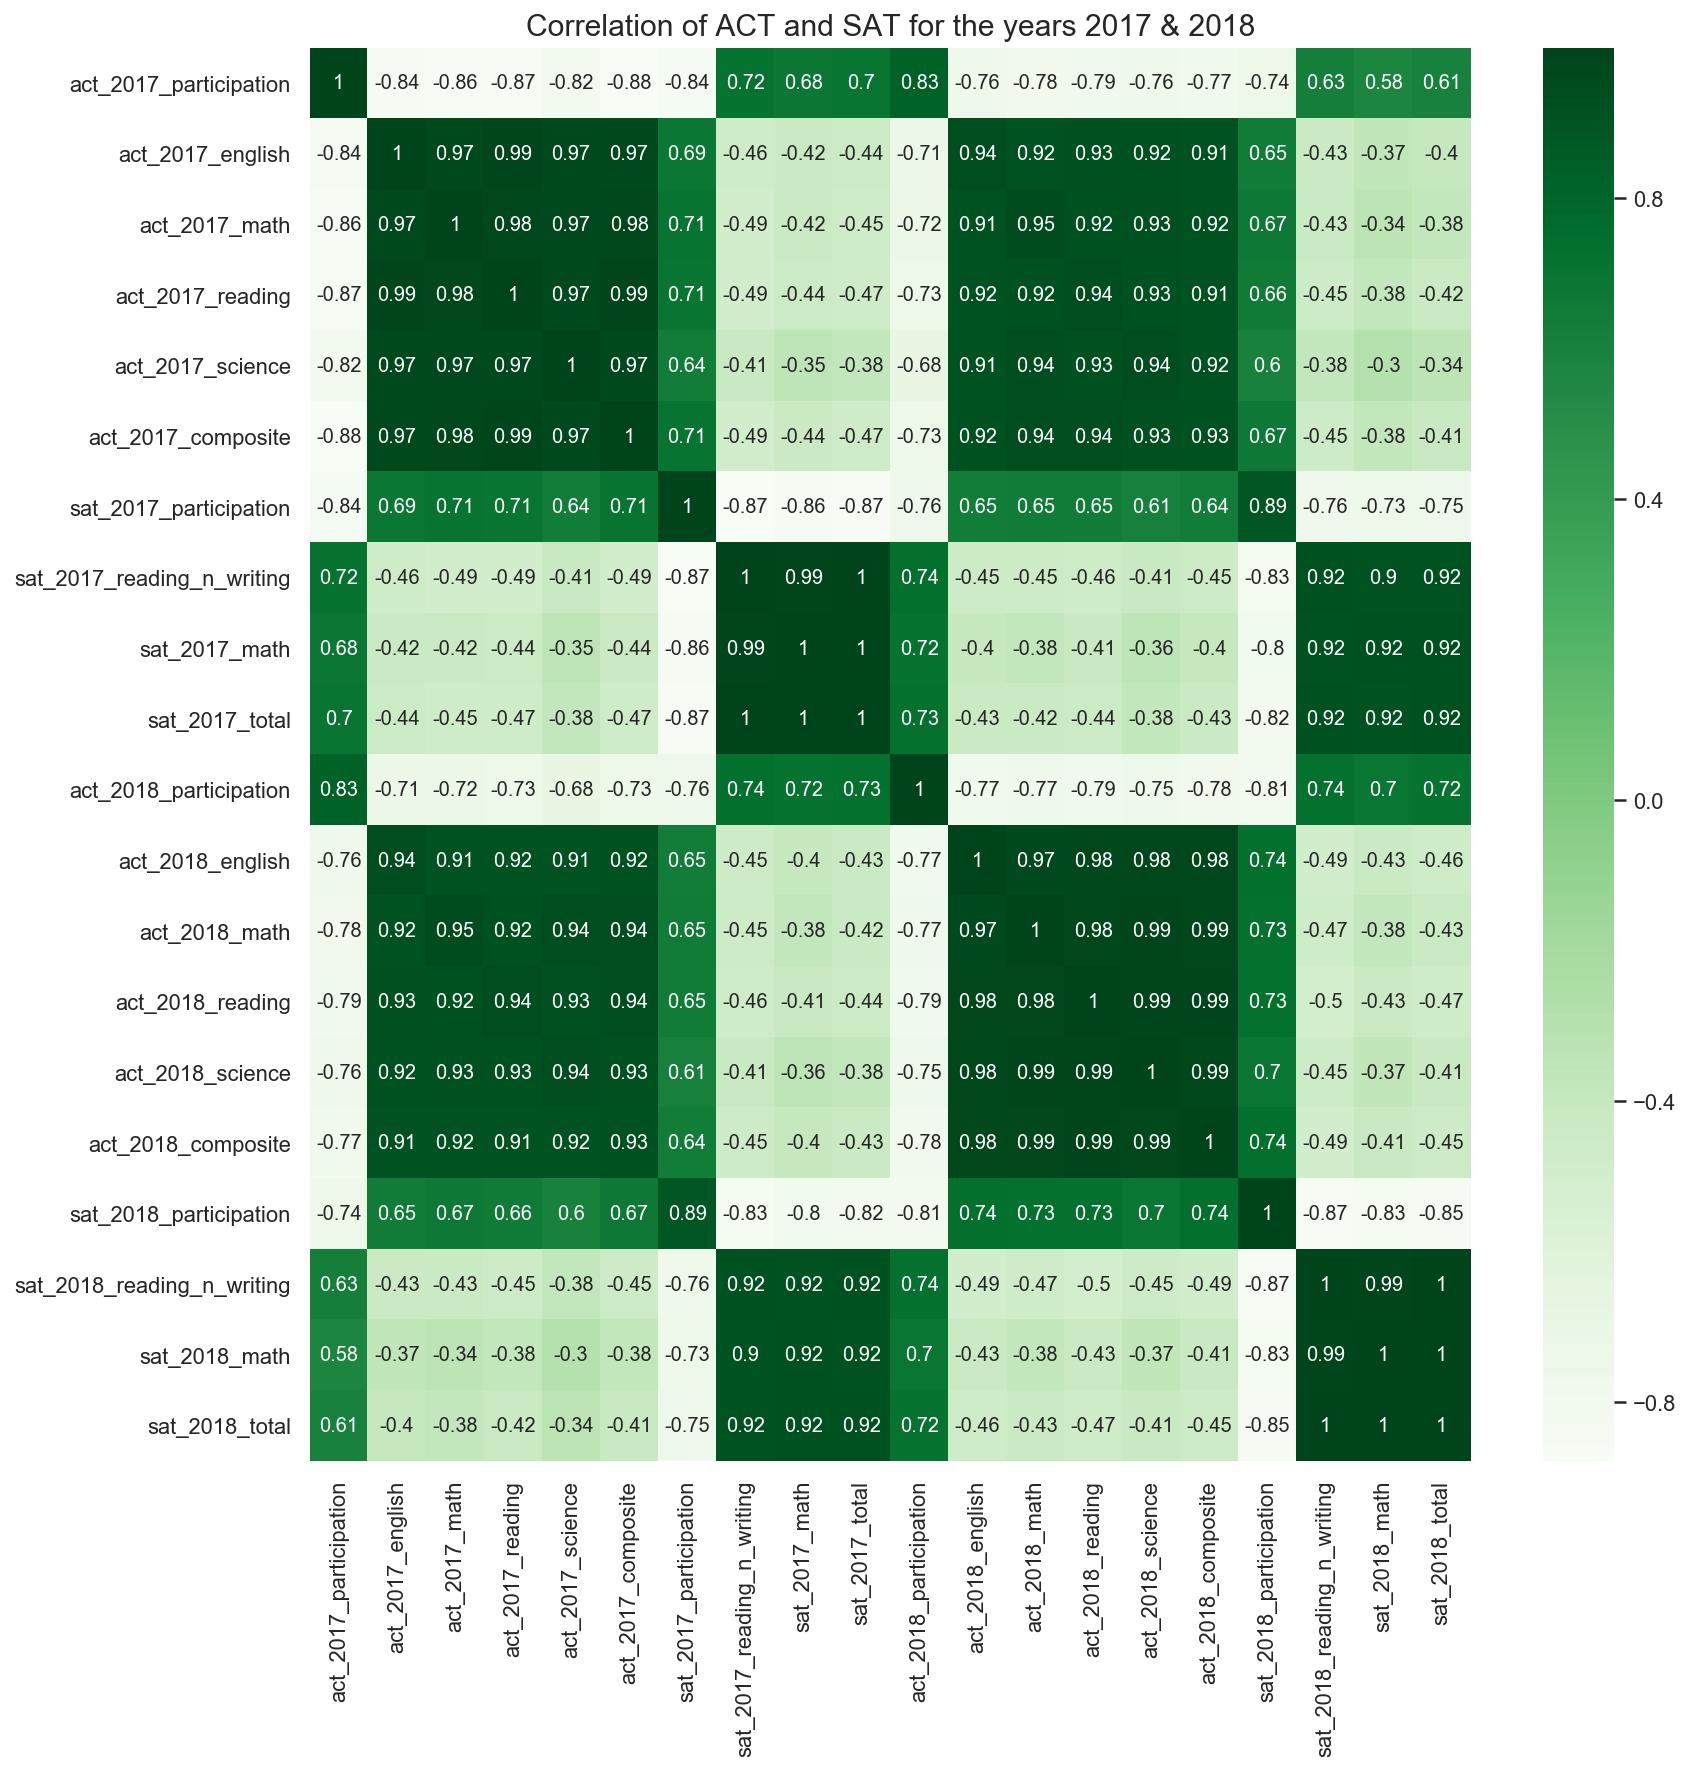

In [67]:
plt.figure(figsize=(13, 13))
heat_map = sns.heatmap(final_combine.corr(), annot = True ,cmap="Greens" )
heat_map.set_title('Correlation of ACT and SAT for the years 2017 & 2018', size = 15)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [68]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2))# Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (20, 20), sharey = True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])# feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

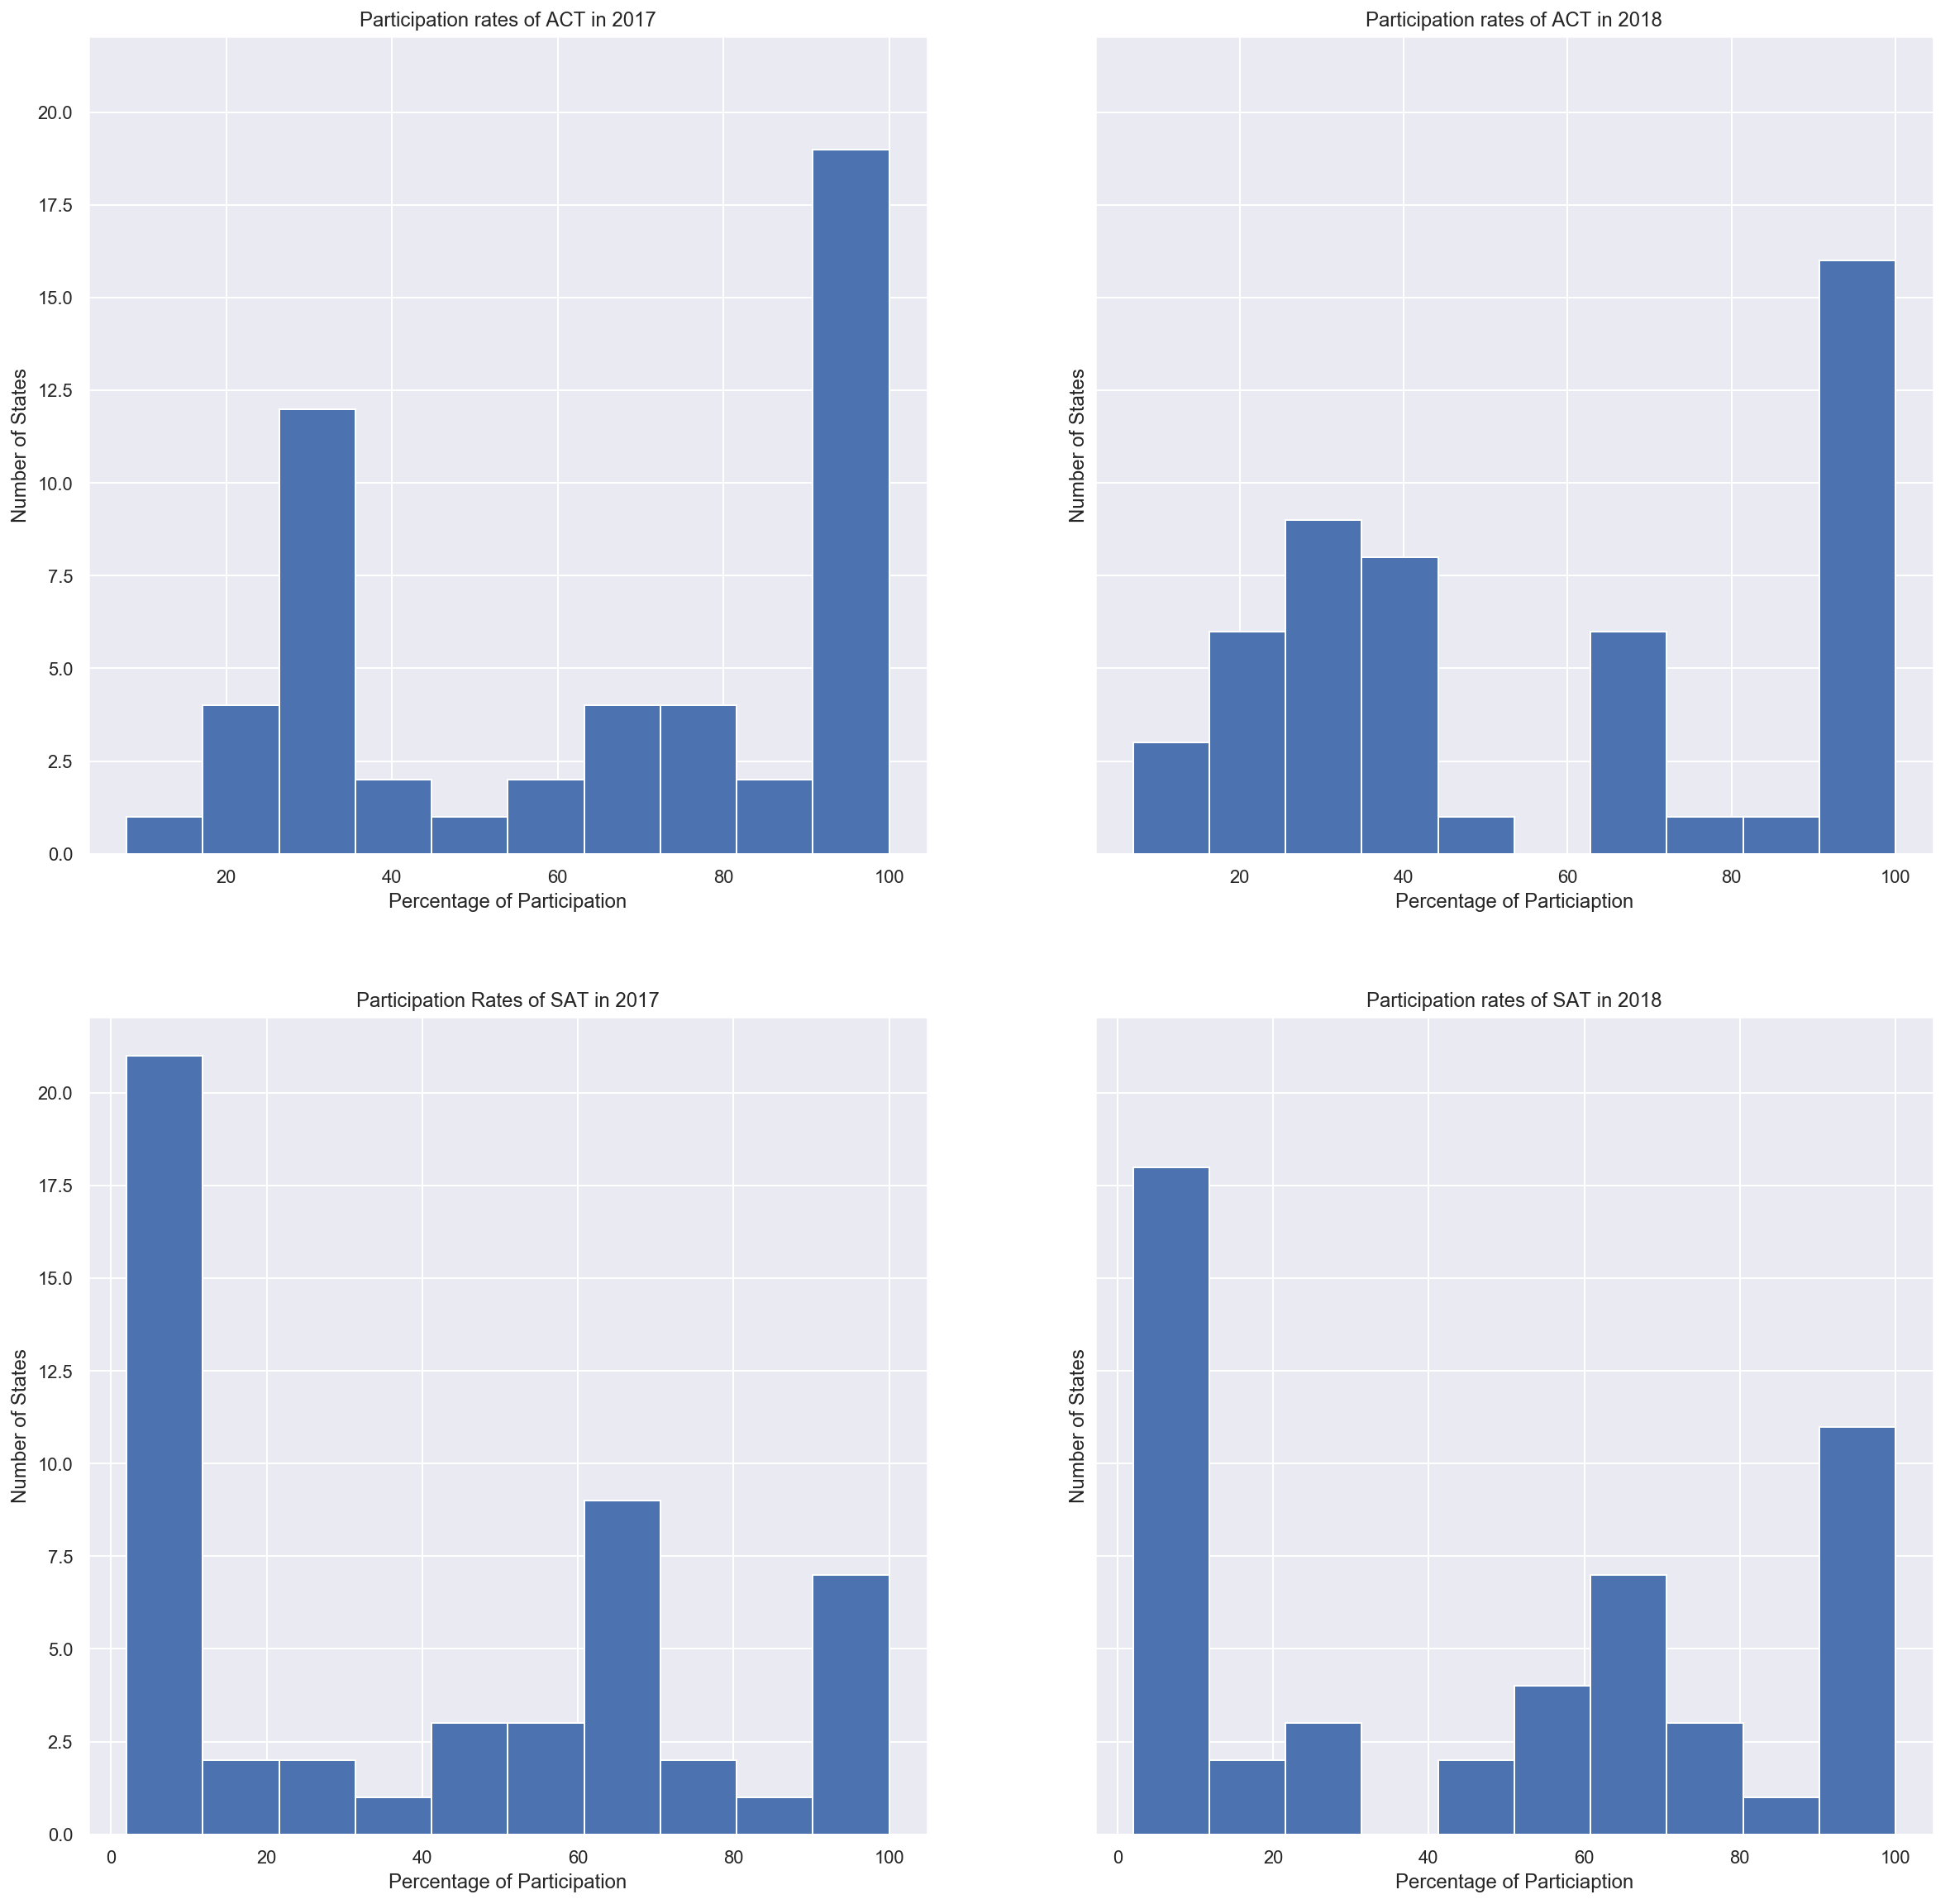

In [69]:
# Participation Rates for SAT & ACT
subplot_histograms(final_combine, ['act_2017_participation', 'act_2018_participation', 'sat_2017_participation' , 'sat_2018_participation' ] , ['Participation rates of ACT in 2017', 'Participation rates of ACT in 2018' , 'Participation Rates of SAT in 2017', 'Participation rates of SAT in 2018'], ['Percentage of Participation', 'Percentage of Particiaption', 'Percentage of Participation', 'Percentage of Particiaption'], ['Number of States' , 'Number of States', 'Number of States' , 'Number of States'])

The ACT, has seen a redcued participation when comparing 2017 and 2018 data. There is a varied spread seen in the 2018 ACT data, where the mode of the distribution comes from the 90-100% participation range. There aren't many states with a 50% participation rate in ACT 2018. Its either some states have a high participation and the others have a low participation rate.  
The SAT has seen a higher participation from 2017 to 2018. Not only are the less states with participation rates less than 20, there are also more states with participation more than 60%.

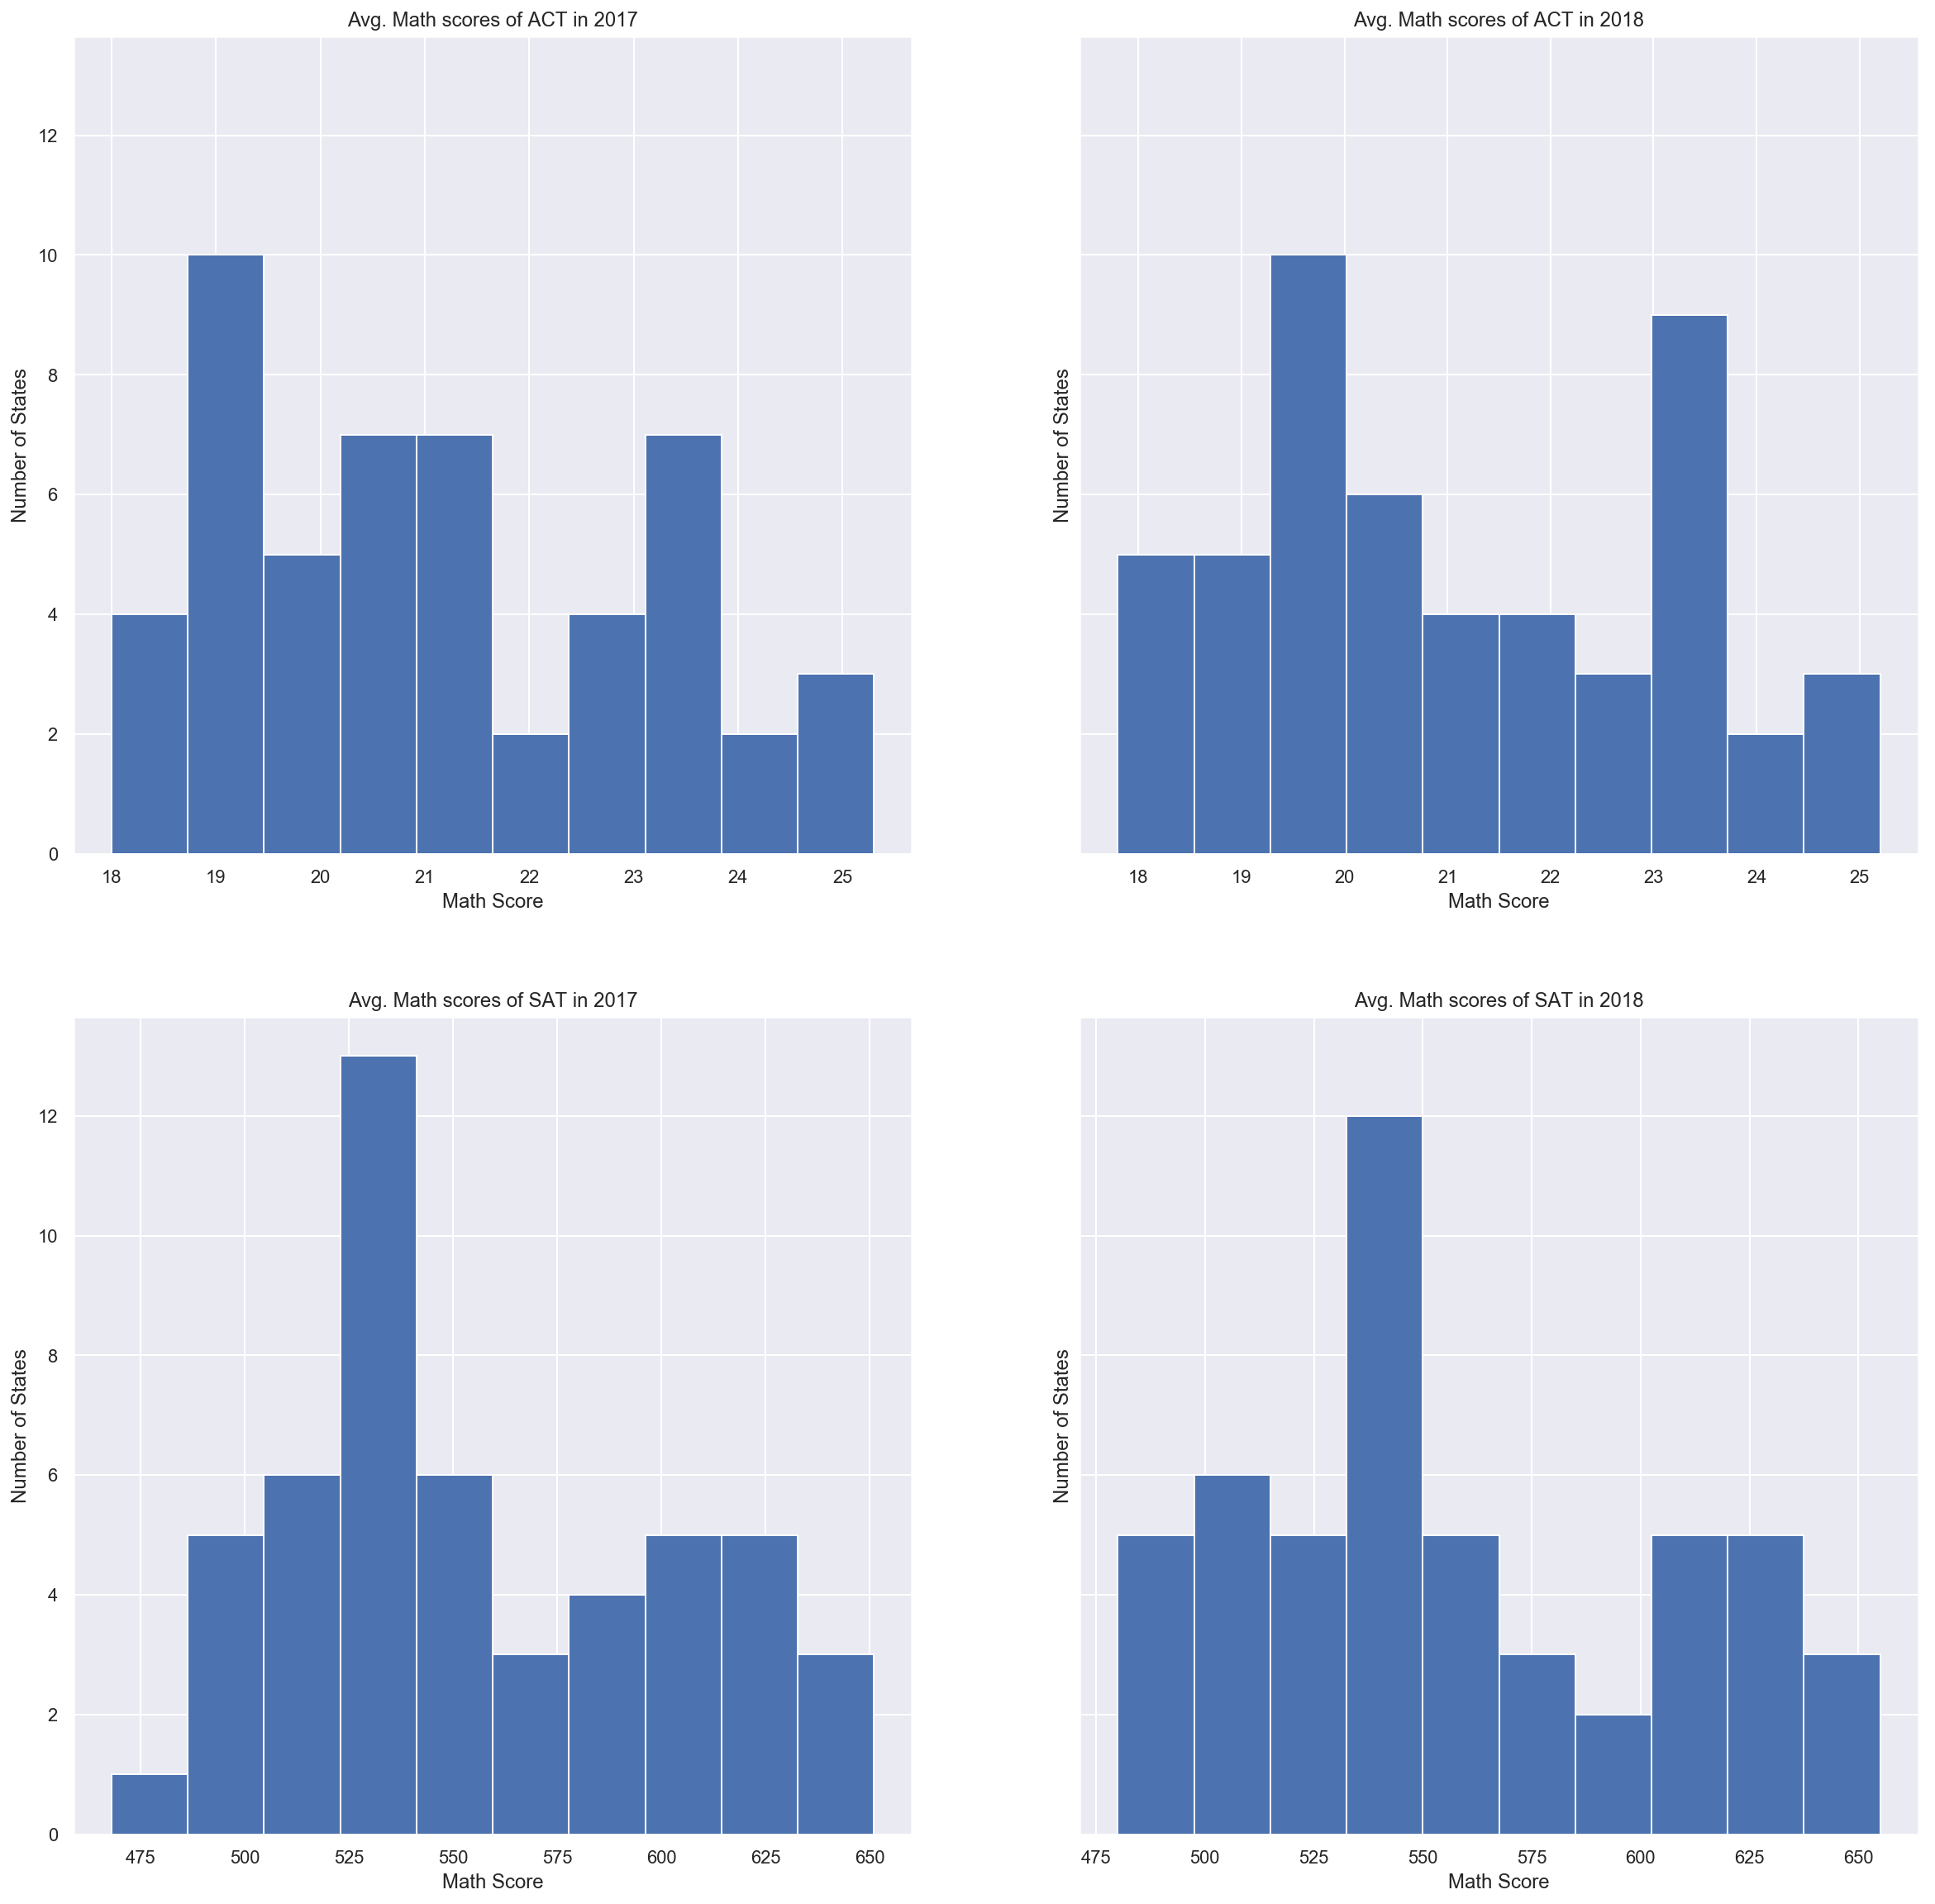

In [70]:
#Math scores in ACT and SAT
subplot_histograms(final_combine, ['act_2017_math', 'act_2018_math', 'sat_2017_math' , 'sat_2018_math' ] , ['Avg. Math scores of ACT in 2017', 'Avg. Math scores of ACT in 2018' , 'Avg. Math scores of SAT in 2017', 'Avg. Math scores of SAT in 2018'], ['Math Score', 'Math Score', 'Math Score', 'Math Score'], ['Number of States' , 'Number of States', 'Number of States' , 'Number of States'])

For ACT exam, the average math scores have increased from 2017 to 2018.
Meanwhile,for the SAT exam, the average math scores have reduced more slightly. There are more states with scores ranging from 475 to 525 for their SAT Math exam. The Maximum Math score has increased slightly in 2018. 

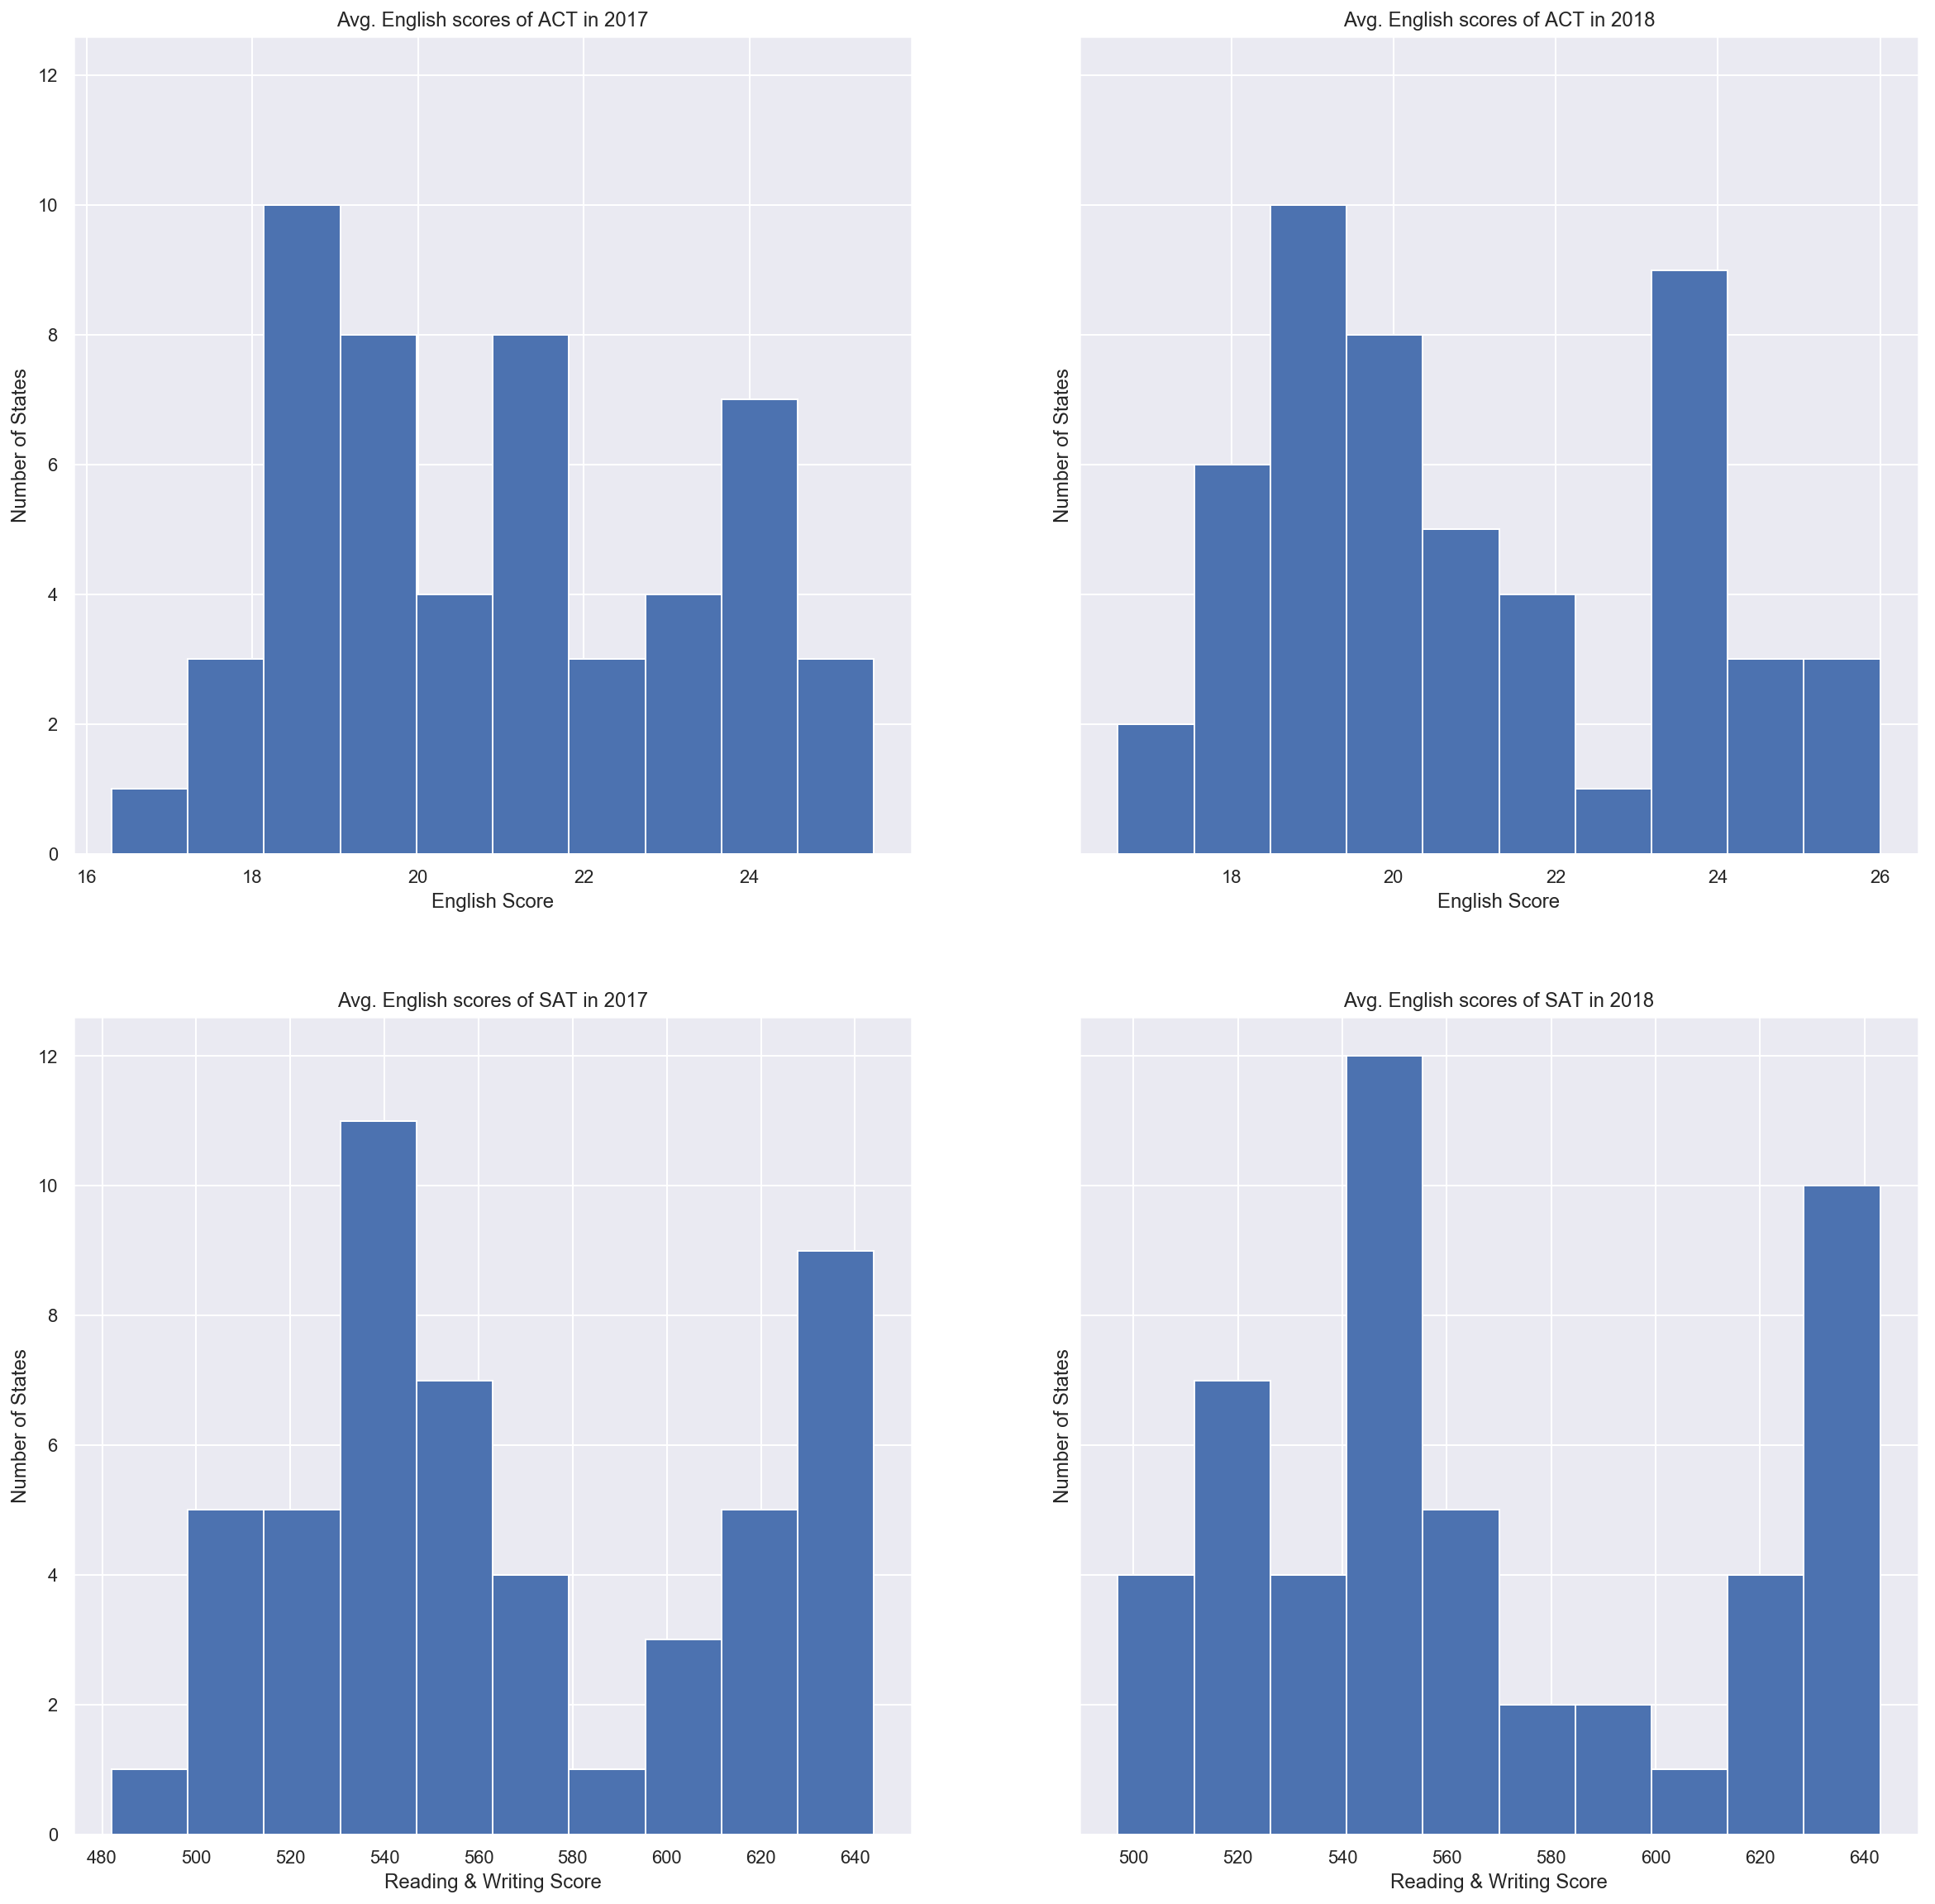

In [71]:
#Reading and Verbal scores for ACT and  SAT for 2017 & 2018
subplot_histograms(final_combine, ['act_2017_english', 'act_2018_english', 'sat_2017_reading_n_writing' , 'sat_2018_reading_n_writing' ] , ['Avg. English scores of ACT in 2017', 'Avg. English scores of ACT in 2018' , 'Avg. English scores of SAT in 2017', 'Avg. English scores of SAT in 2018'], ['English Score', 'English Score', 'Reading & Writing Score', 'Reading & Writing Score'], ['Number of States' , 'Number of States', 'Number of States' , 'Number of States'])

The minimum and maximum values of the ACT 2018 has increased from the previous year for the English Component. Moreover, the average English score has increased in many states in ACT 2018.
Next, for the SAT  2018 exam, the minimum average Reading and Writing has increased. The 2018 SAT cohort has done better than the previous batch. 

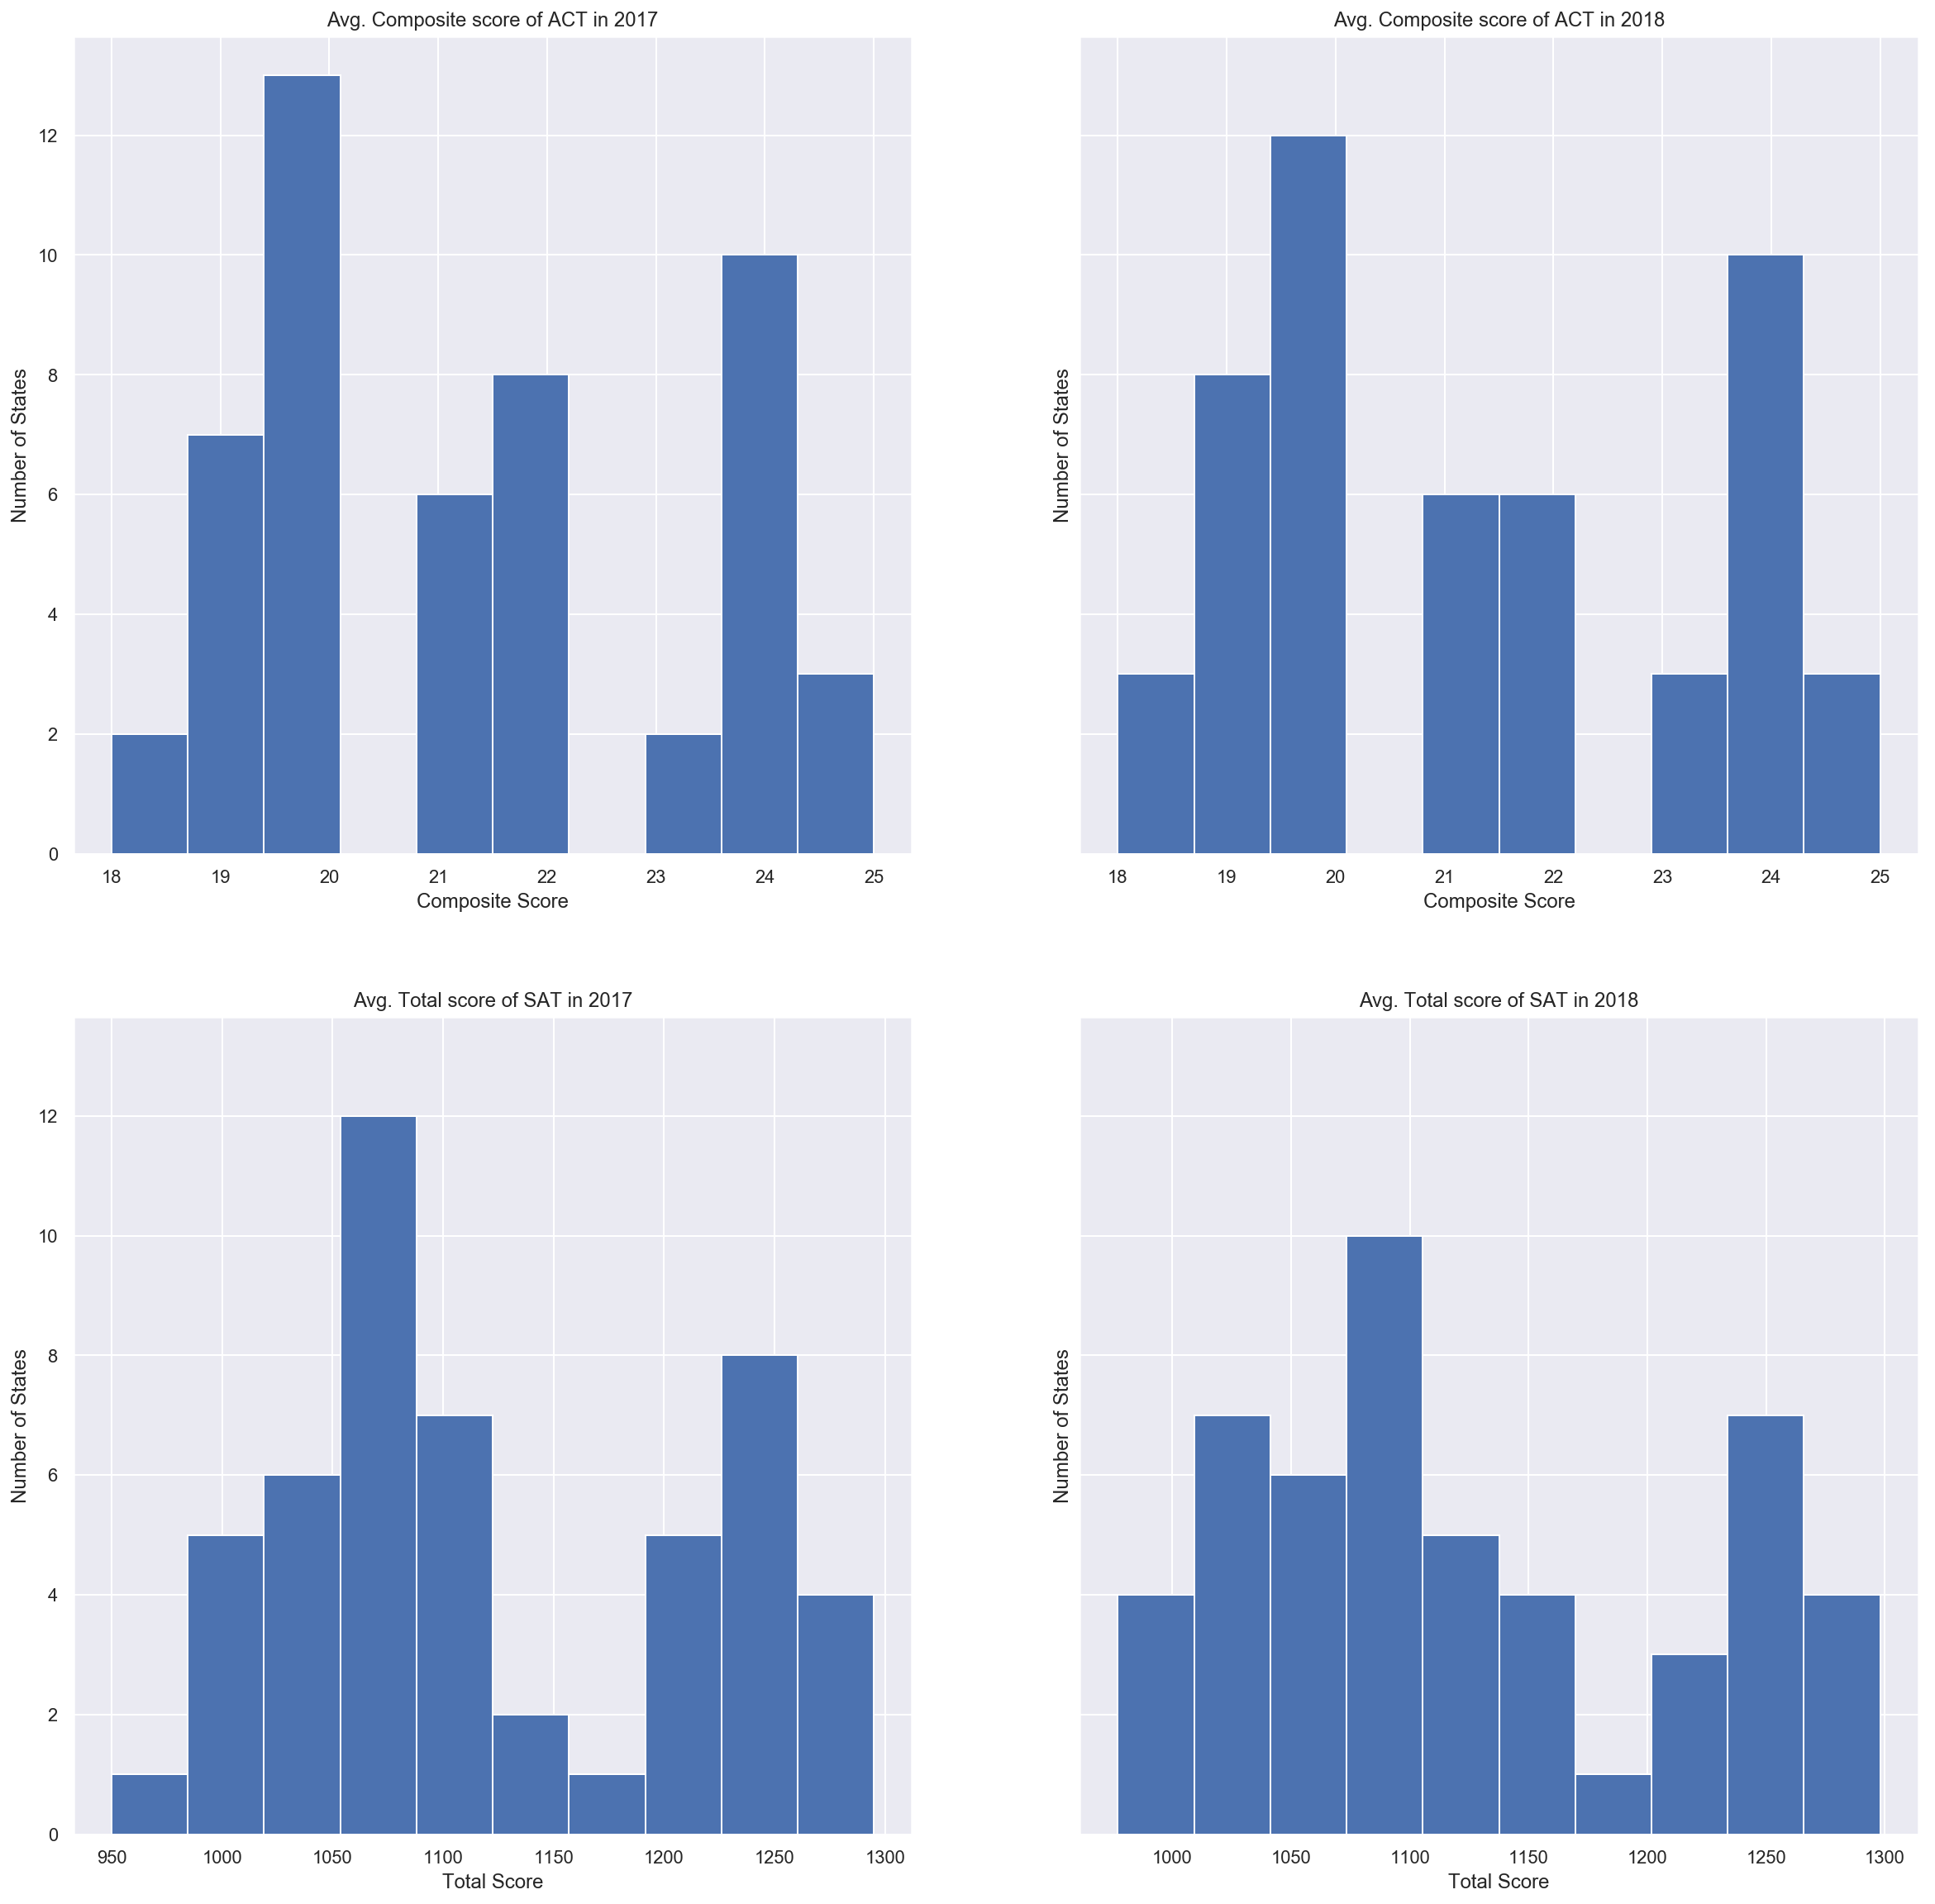

In [72]:
#Composite Score and total score comparison 
subplot_histograms(final_combine, ['act_2017_composite', 'act_2018_composite', 'sat_2017_total' , 'sat_2018_total' ] , ['Avg. Composite score of ACT in 2017', 'Avg. Composite score of ACT in 2018' , 'Avg. Total score of SAT in 2017', 'Avg. Total score of SAT in 2018'], ['Composite Score', 'Composite Score', 'Total Score', 'Total Score'], ['Number of States' , 'Number of States', 'Number of States' , 'Number of States'])

When we take a look at the ACT histograms, we observe that the composite scores in the ACTs seem to be rather similiar to each other, with few diferences seen in the two histograms. 
The average total score for SAT examinations significantly reduced from 2017 to 2018. 

**Plot and interpret scatter plots**
For each of the following:

SAT vs. ACT math scores for 2017

SAT vs. ACT verbal/reading scores for 2017

SAT vs. ACT total/composite scores for 2017

Total scores for SAT 2017 vs. 2018

Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:

Two clearly labeled axes
A proper title
Using colors and symbols that are clear and unmistakable
**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.

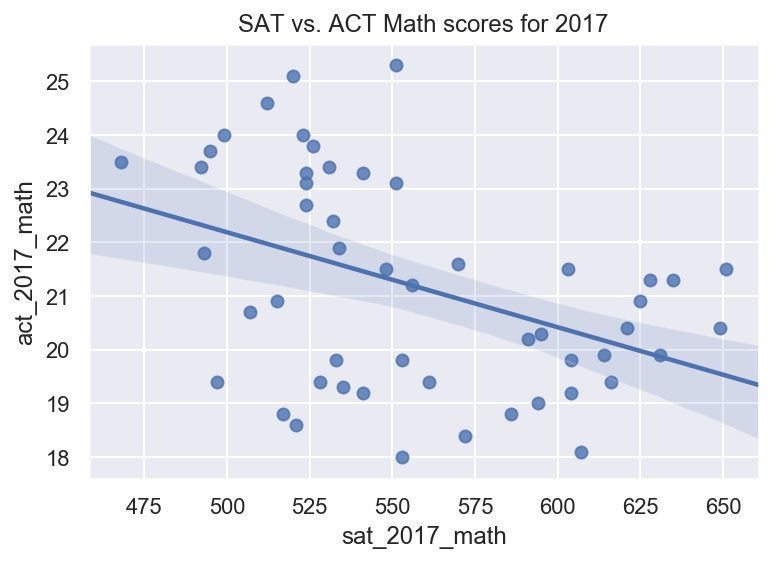

In [73]:
#SAT vs. ACT math scores for 2017

sns.regplot(x=final_combine["sat_2017_math"], y=final_combine["act_2017_math"]).set_title('SAT vs. ACT Math scores for 2017')
sns.set(rc={'figure.figsize':(10,10)})

There seems to be a neagtive correlation between the act_2017 math scores and the SAT 2017 Math scores. The negative correlation is not very strong as the points are all far apart from the regression line. There is a common trend, where if the state does well in the ACT Math exam, they do poorly in the SAT exams. This might be because the ACT Math paper does not involve a section known as the 'No calculator' as said in one prep-scholar article(1). Those states which do well in ACT math may be more acclimatized to using calculators. Since the SAT Math component has a 'No Calculator' section, many of the students from these states might struggleas they are required to answer math sums without a calculator. Therefore, the states that we would target to increase the SAT population needs to have a acclimatized to attempting Math quesrions without their calculators. This would prevent the students from being traumatized by the SAT Math Exam and prevents them from attempting the SAT altogether.
However, the states who do well in the SAT Math exam fair moderately in the ACT Math exam. 

(1) - https://blog.prepscholar.com/act-vs-sat


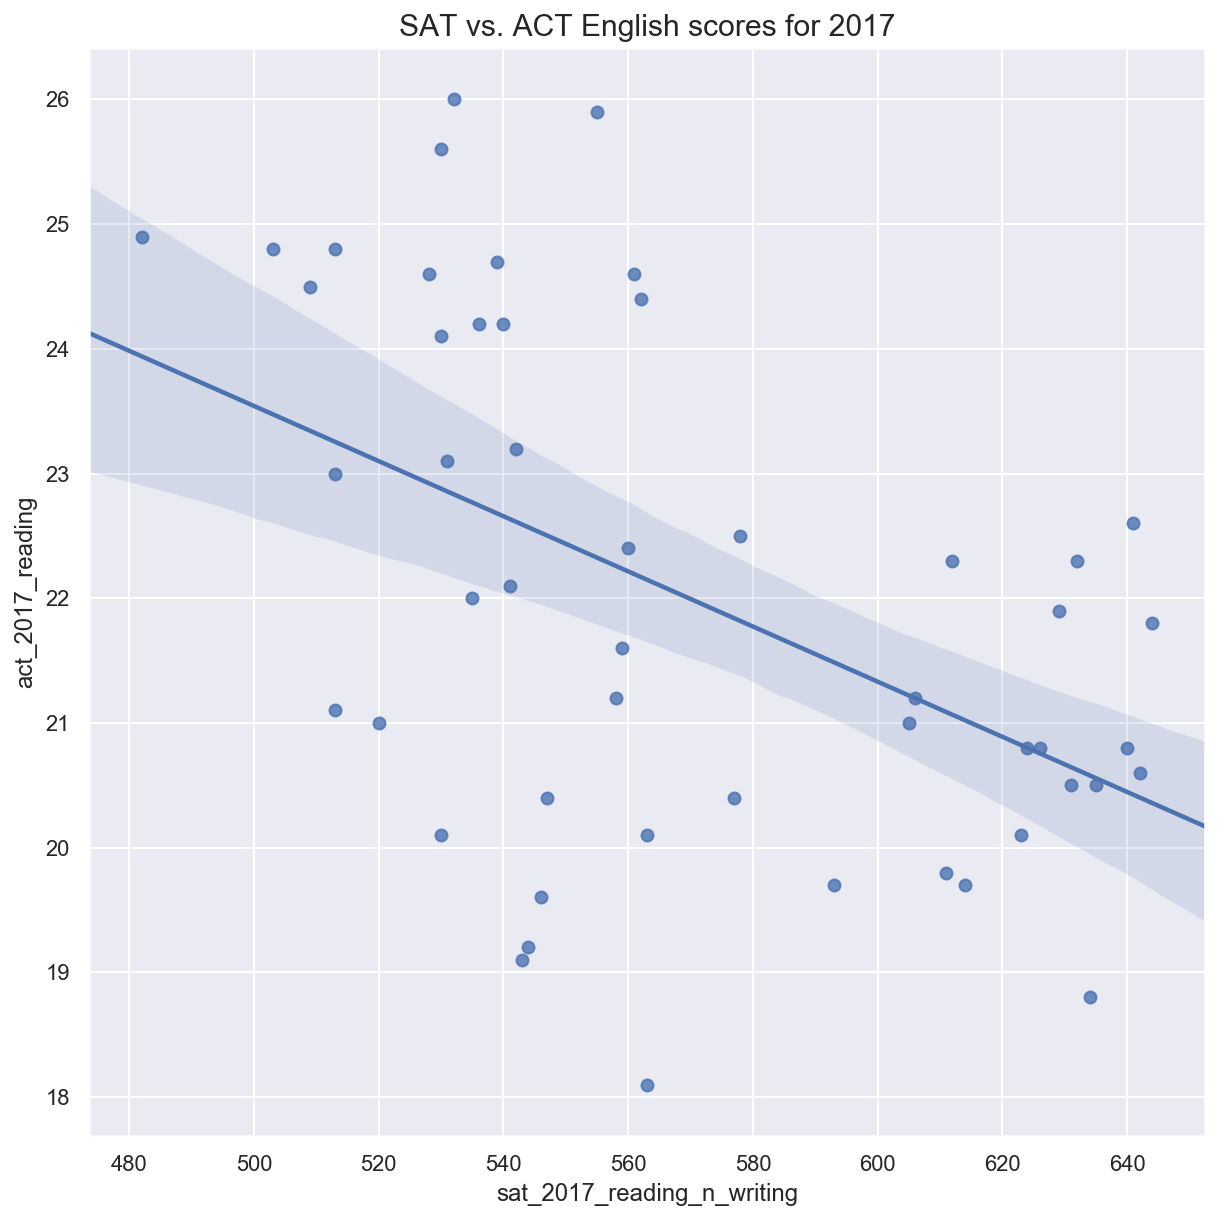

In [74]:
#SAT vs. ACT verbal/reading scores for 2017
sns.regplot(x=final_combine["sat_2017_reading_n_writing"], y=final_combine["act_2017_reading"] ).set_title('SAT vs. ACT English scores for 2017', size = 15)
sns.set(rc={'figure.figsize':(5,5)})

The main trend is that the states that do well in the ACT English segment do badly in the SAT English section. Once again, we see the similar trend that the states which do well for the SAT English segment do moderately well for the English ACT exam. 

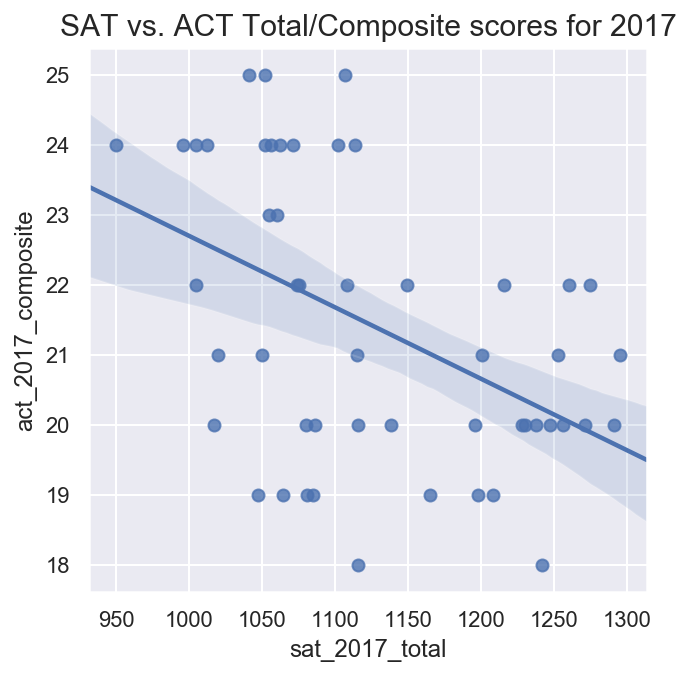

In [75]:
#SAT vs. ACT total/composite scores for 2017
sns.regplot(x=final_combine["sat_2017_total"], y=final_combine["act_2017_composite"] ).set_title('SAT vs. ACT Total/Composite scores for 2017', size = 15)
sns.set(rc={'figure.figsize':(5,5)})

Based on the scatterplot above , we can observe that the ACT Composite Score and SAT Total Score for 2017 has a poor negative correlation. This is the case beacause, not many of the states fall within the regression line. Therfore, we can conclude that the states which have high composite scores have a very low SAT Total score.
This might be because there is more participation in the ACT than SATs in those states. Therefore, those who dont do so well might want to distinguish themselves from other candidates from their state by attempting to do the SAT exam.

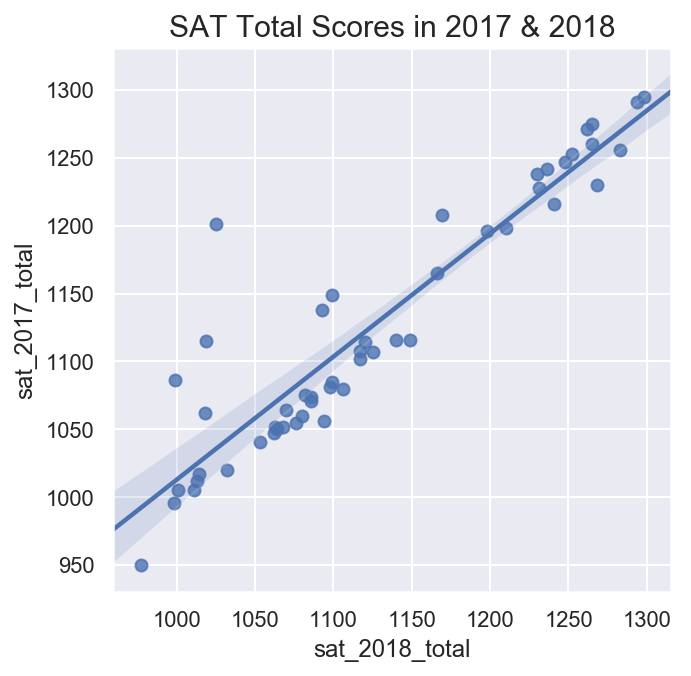

In [76]:
#Total scores for SAT 2017 vs. 2018
sns.regplot(x=final_combine["sat_2018_total"], y=final_combine["sat_2017_total"] ).set_title('SAT Total Scores in 2017 & 2018', size = 15)
sns.set(rc={'figure.figsize':(5,5)})

There is a strong positive correlation between the SAT total scores from 2017 and 2018 as many of the states lie very closely to the regression line in the scatter plot above. This means that if the state had a high total SAT score in 2017 there is a high chance that they will have a high total SAT score in 2018 as well.

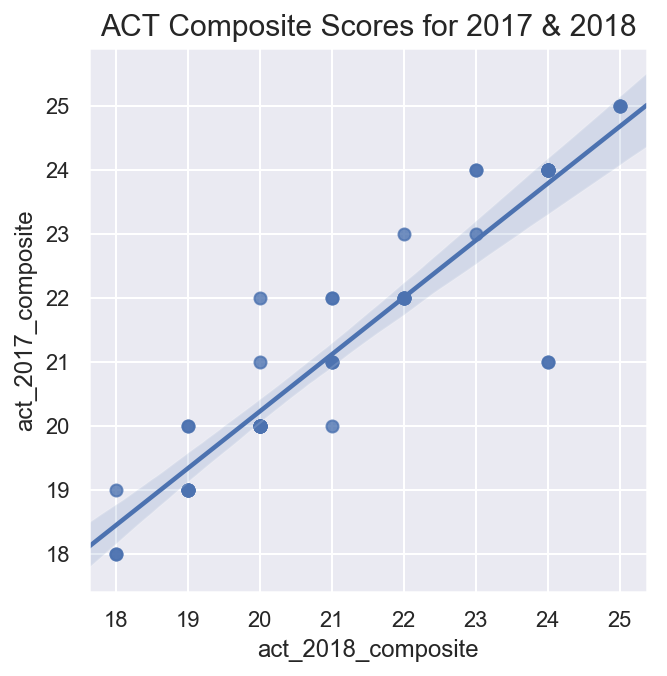

In [77]:
#Composite scores for ACT 2017 vs. 2018
sns.regplot(x=final_combine["act_2018_composite"] ,y=final_combine["act_2017_composite"]).set_title('ACT Composite Scores for 2017 & 2018', size = 15)
sns.set(rc={'figure.figsize':(10,10)})

There are some states which lie on the regression line which suggests that there is a linear relationship between the total ACT Composite score in 2017 and 2018. There are only a few states which have improved their composite score from 2017 to 2018. Further, there a considerable amount of states that have a reduced composite score in 2018 as compared to 2017.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

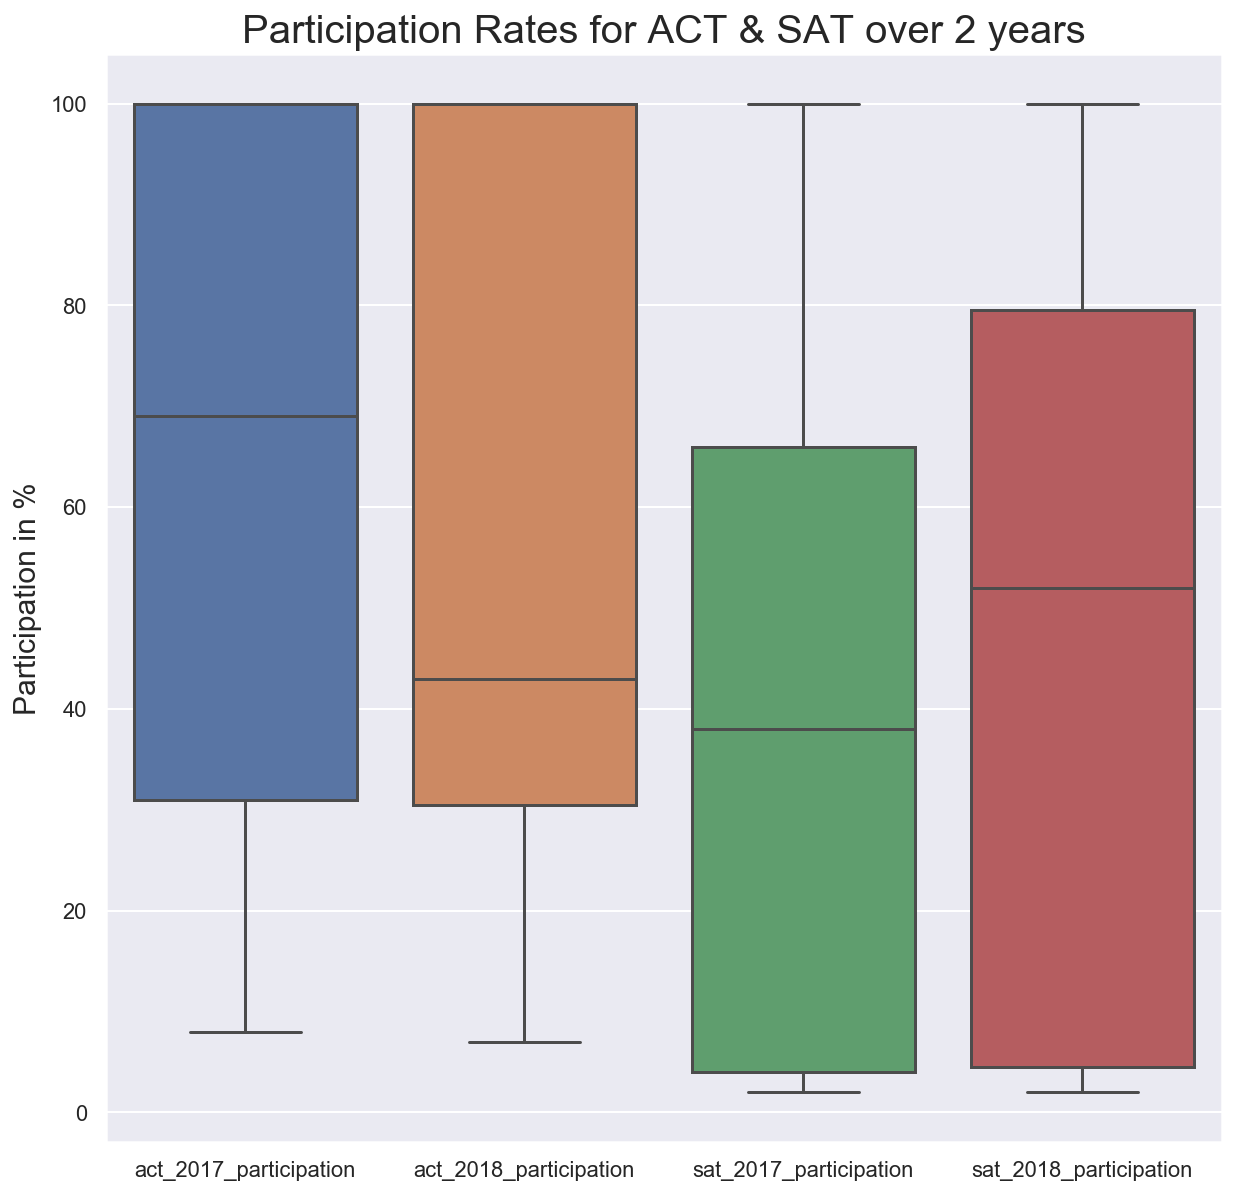

In [78]:
# Participation Rates for all 4 examinations
fig,ax = plt.subplots(figsize = (10,10))
plt.title('Participation Rates for ACT & SAT over 2 years', size = 20)
plt.ylabel('Participation in %', size = 15)
sns.boxplot(data= final_combine[['act_2017_participation', 'act_2018_participation', 'sat_2017_participation' , 'sat_2018_participation']])


The median of participation for the ACT examination has decreased considerably. The ACT median Paricipation percentage has dropped from about 70% to 45%. Whereas, for the SAT examinations the median participation percentage has increased from 30% to 55%.Moreover there is a bigger spread in the 2018 SAT participation percentage as compared to 2017.

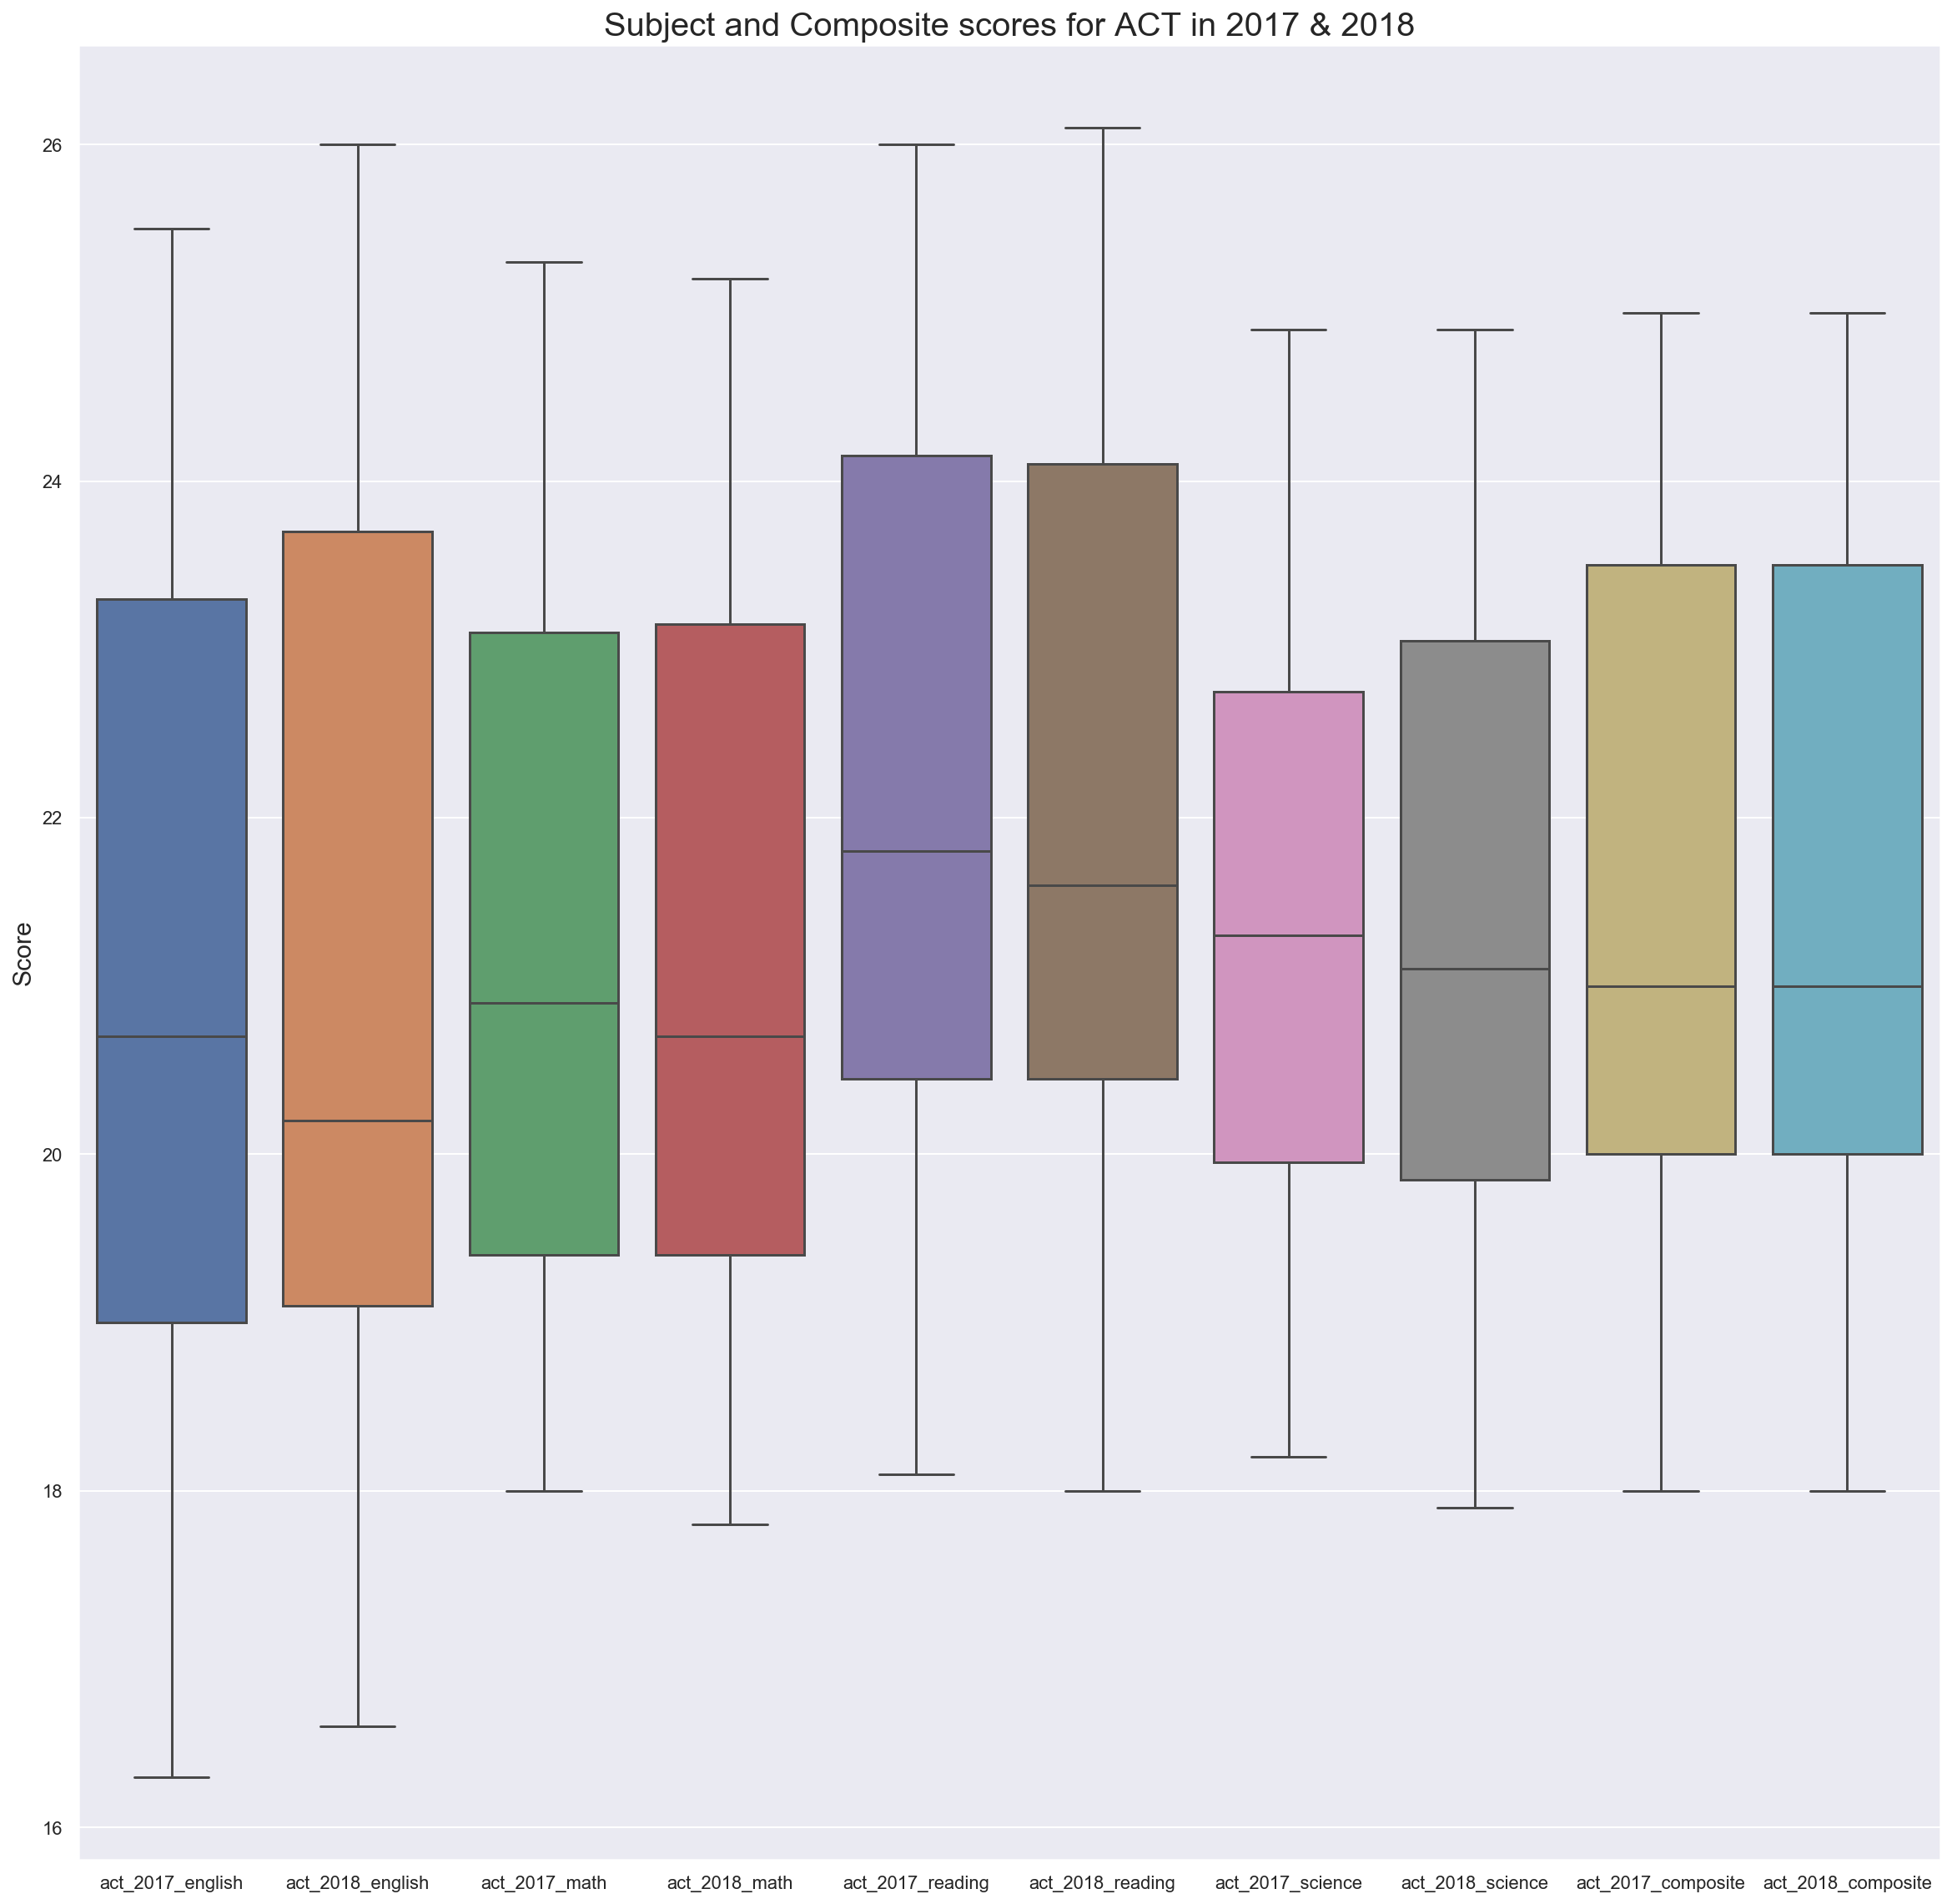

In [79]:
#act subjects and composite scores for 2017 and 2018
fig,ax = plt.subplots(figsize = (20,20))
plt.title('Subject and Composite scores for ACT in 2017 & 2018', size = 20)
plt.ylabel('Score', size = 15)
sns.boxplot(data= final_combine[['act_2017_english', 'act_2018_english', 'act_2017_math','act_2018_math', 'act_2017_reading' , 'act_2018_reading' ,  'act_2017_science', 'act_2018_science','act_2017_composite', 'act_2018_composite']])



In the order of subjects on the boxplots, let us take a look at English scores first, the  maximum English score has improved from 2017 to 2018 and the median has dropped when comparing both years. Secondly, the Math and the Reading test scores have similar distribution between 2017 and 2018. 
Next, for the Science test score, there is an increase in the distibution between 2017 and 2018.
Lastly, the composite score for years 2017 and 2018 seems to be very similar to each other. 

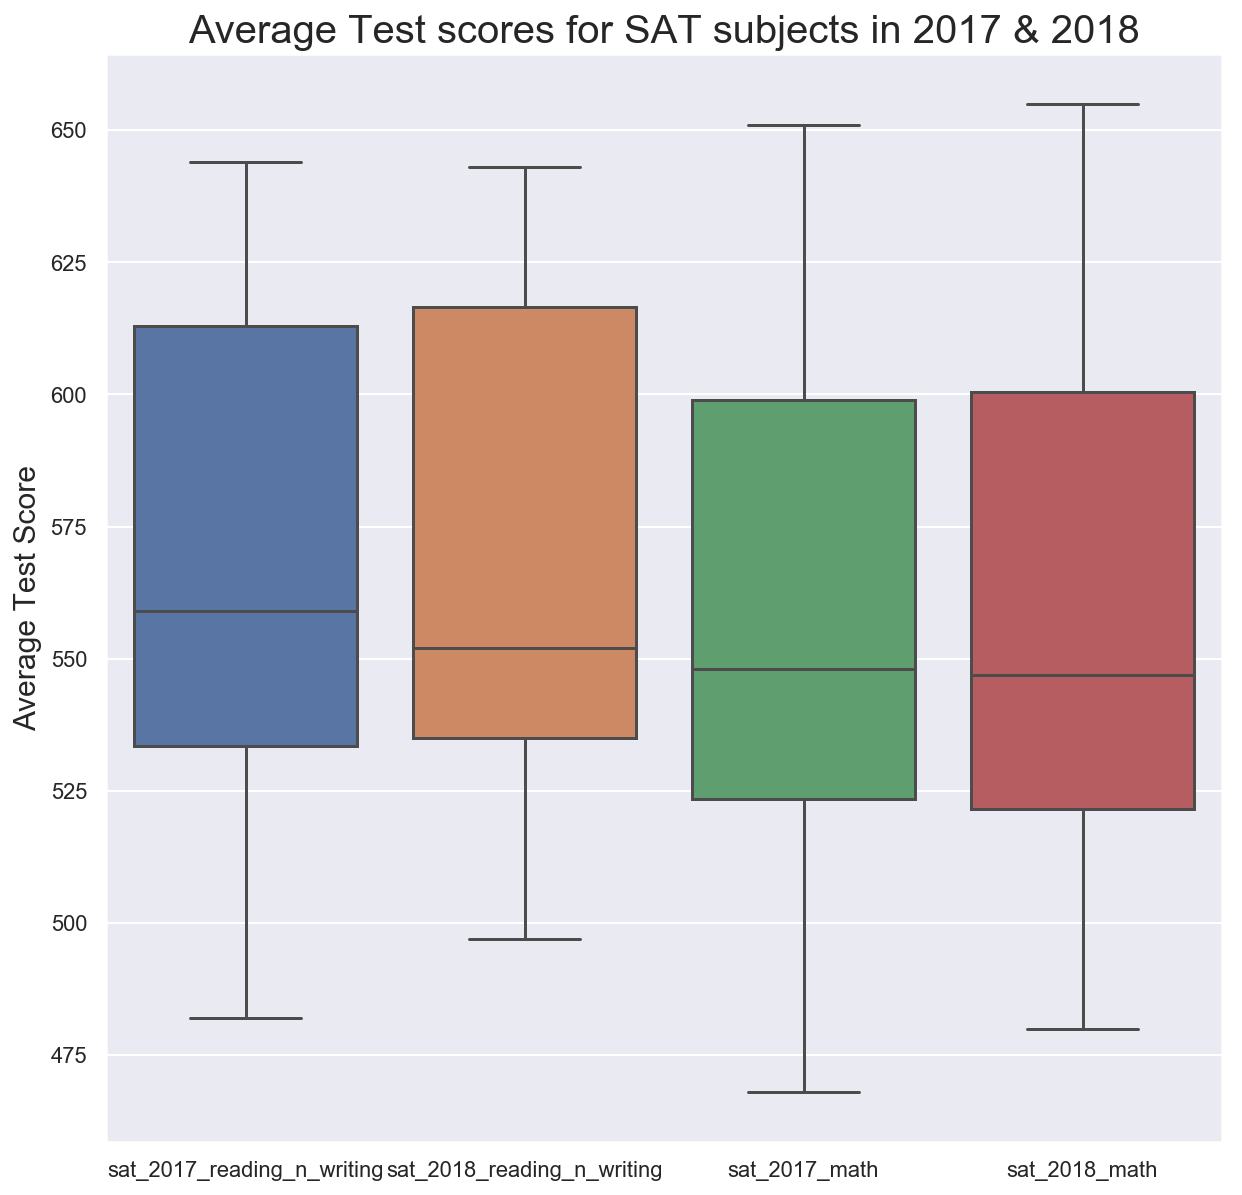

In [80]:
fig,ax = plt.subplots(figsize = (10,10))
plt.title('Average Test scores for SAT subjects in 2017 & 2018', size = 20)
plt.ylabel('Average Test Score', size = 15)
sns.boxplot(data= final_combine[['sat_2017_reading_n_writing', 'sat_2018_reading_n_writing','sat_2017_math', 'sat_2018_math']])


The SAT Evidence Based Reading and Writing(EBRW) minimum score has increased from 2017 to 2018.However, the median EBRW has dropped slightly. 
On the other hand, there are some changes in the math scores. Although the distibution of math scores seem to be similar, the minimum and maximum Math scores have increased for 2018.

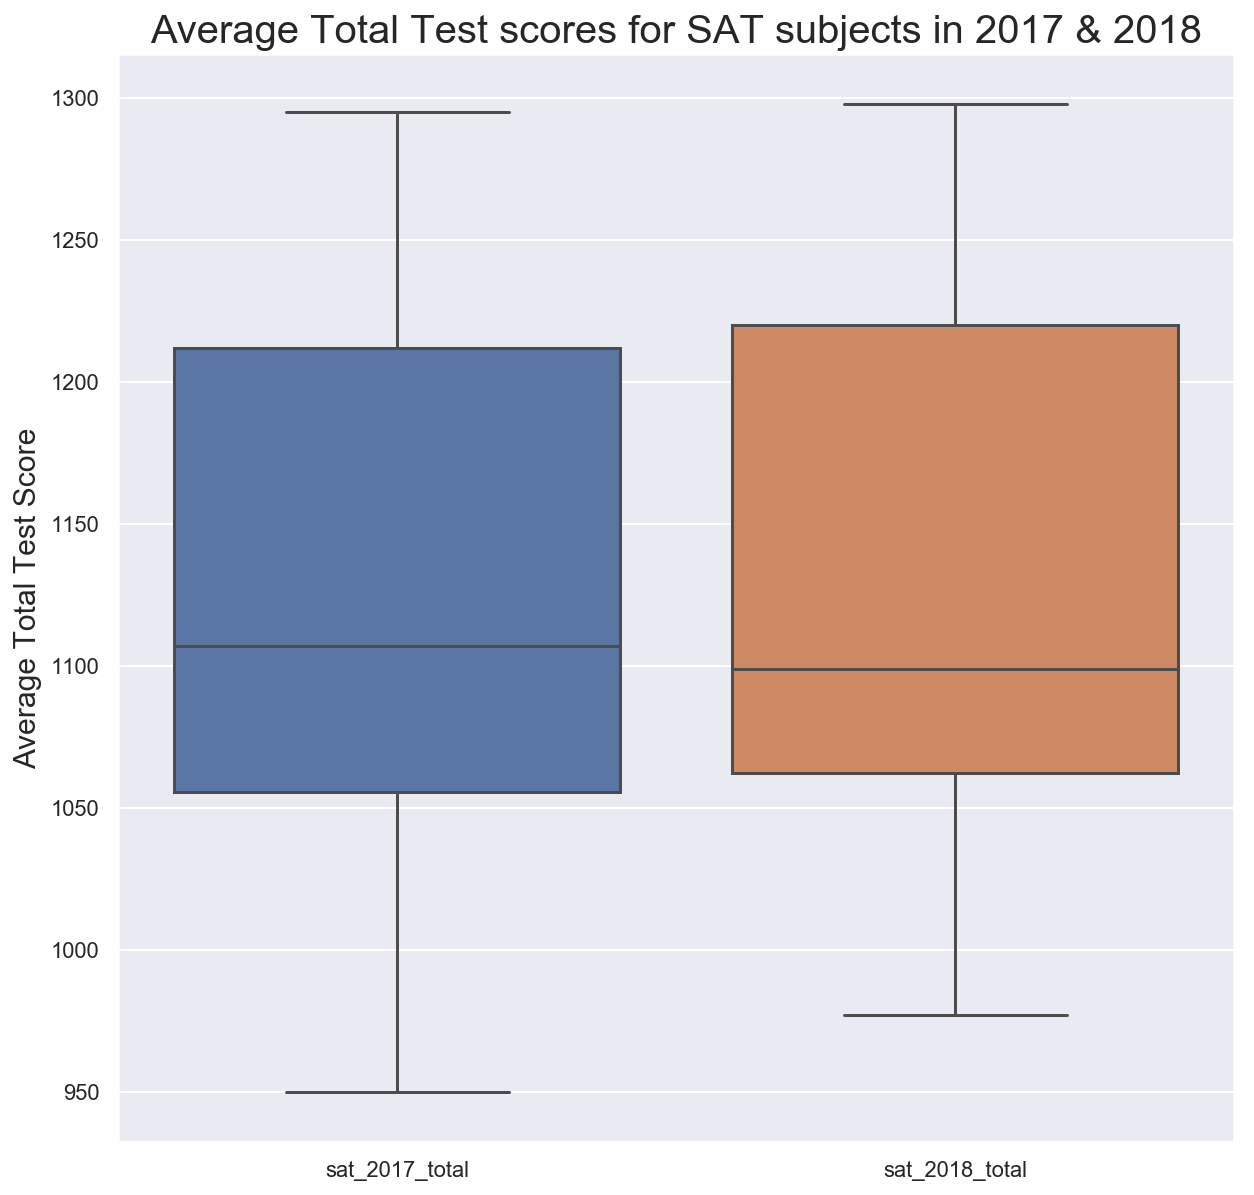

In [81]:
#sat_total scores
fig,ax = plt.subplots(figsize = (10,10))
plt.title('Average Total Test scores for SAT subjects in 2017 & 2018', size = 20)
plt.ylabel('Average Total Test Score', size = 15)
sns.boxplot(data= final_combine[['sat_2017_total', 'sat_2018_total']])



There is an increase in the distribution of total SAT test scores from 2017 to 2018. Further, the total 2018 test scores for the SAT exam has improved it's minimum and maximum test scores from 2017. The median Total Score has slightly dropped from 2018 in comparison to the previous year.

[Back to top](#top)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

**Answers:**

act_2017_participation: The ACT 2017 participation is slightly skewed to the left as the mean is slightly lower than the median.

act_2017_english: The ACT english scores in 2017 seem to be normally distributed as the mean is fairly close to the median. The distribution is highly spread out as the range of values is very high.

act_2017_math: The Math ACT scores in 2017 has a positive skew because the mean is a little higher than the median.

act_2017_science: The distribution is normally distributed as the mean is very close to the median. 

act_2017_reading: The 2017 reading scores are right skewed as the median is slightly lower than the mean.

act_2017_composite: The 2017 ACT composite score is also slightly skewed to the right as the mean is bigger than the median.

sat_2017_participation: Although the SAT 2017 participation seems to be normally distibuted, it is slightly skewed to the right as the mean is slightly higher than the median.

sat_2017_reading_n_writing: The SAT English component scores are heavily skewed to the right because of the mean being higher than the median.

sat_2017_math: The distibution is considerably skewed to the right as the median is much lower than the mean. To add on, the distribution is big.

sat_2017_total: Similarly, the total score of SAT in 2017 is positively skewed as there is a huge difference between the mean and the median, where the mean is higher than the median.

act_2018_participation: The act 2018 participation is skewed more to the right as the mean is much higher than the median.

act_2018_english: The ACT 2018 English scores are slightly skewed to the left due to the mean being higer than the median by a little margin. 

act_2018_math: Once again, similar to the previous year, there is a slight positive skew in the distribution as the value of mean is bigger than the median.

act_2018_science: Like 2017, the ACT 2018 science distribution is normally disributed because of the close proximity of the mean and median values.

act_2018_reading: The distribution of the 2018 reading scores is skewed to the right as the mean is higher than the median. The distribution of the reading scores is big.

act_2018_composite: The composite score for ACT 2018 is positively skewed as the value of median is much lower than the mean.

sat_2018_participation: The 2018 SAT participation seems to be skewed to the left because the mean is much lower than the median.

sat_2018_reading_n_writing: Positve skewness is observed as the mean is bigger than the median.

sat_2018_math: The distribution is slightly skewewd to the right as the median is slightly smaller than the mean.

sat_2018_total: The 2018 SAT total score is heavily skewed to the right as the mean is much bigger than the median. 


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

**Answer:**
According to the Central Limit Theorem (CLT) any sample which has a sample size at least more than 30 is deeemed to be seen as normally distributed. Therfore since there are 51 samples in our dataset, I feel that based on CLT we can safely assume that the sample from the population is normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:** I feel that there wouldnt much effect on the estimates of all the other data as they all surpass the minimum number of samples to be normally distributed according to the CLT theory. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:** It does not make sense, as we would be required to see how other factors influence the participation rates. For example, if we specifically just see the participation rates we might not be able to gain a lot of insights as compared to when seeing them with the other data.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

**Answer:** It might not be a good idea to compare both the Math test scores with each other as they clearly differ in vigor. Moreover, as mentioned earlier both the ACT and SAT have slightly different sections and topics covered in their Math sections. For instance, the SAT Math test has a 'no calculator' section where students arent allowed to use their calculators to do their Math sums. Therefore, I feel that it might not be a good idea to compare the SAT and the ACT scores as they are different from each other. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 


It does not feel appropriate as there needs to be more samples to do statisical evalutaions of our distributions.

[Back to top](#top)

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The 3 states that we will be focusing on based on their participation rates:

-Oregon
 - Oregon is one of the only states where the participation of ACT and SAT is lower than 50% for both years. According to the post from Magoosh website(1), Oregon is one of the many states that do  not offer any form of subsidies for students taking their pre-college exams. This might be the main reason why, there is a very low participation rates in that state. We can see a high participation rate in other states which have sponsorships of standardized tests.
 
-Oklahoma
  - Oklahoma's participation rate is very low for both the tests in 2018, considering that its one of the most student centric state. Such a remark has to be made as Oklahoma is the only state in the whole of USA that offers subsidies for both the ACTs and the SATs for its students(1). Moreover, both these exams arernt required to be done by highschool students. Students have a say on whether they want to take any of these exams. Hence, its very shocking that a state which fully subsidizes these exams (SAT & ACT) has such a low participation rate. The state of Oklahoma would be seen in greater detail at the recommendations section.

-South Dakota
 - The eduaction week has posted on the highschool exams of every state. According to the Education Week (2), South Dakota uses the test called Smarter Balanced.Moreover, just by inferring from the data above known as final_combine, we observe that South Dakota also has a very high ACT population. Therefore, a possible reason for having very low SAT participation might be due to higher importance given to the alternative exams such as ACT and Smarter Balanced in the particular state.
        
        

According to the prep scholar article(3):

    -The price of the SAT and the ACT are roughly the same
    -Due to the revamp of the SAT testing, there are more similariteis seen between the 2 standardized testing.
    -The SAT testing is slightly longer form of testing as compared to the ACT. However,this is a benfit as there is  more time given to each question. Therfore, if you want to have more time to think about the questions,then SAT would be a better choice.
    -When compared to the ACT, the SAT exam doent have a specific science section
  
    -Another article from the prep scholar states the following(4):

     -The following 15 states use the ACT as part of their statewide testing regimen:
          -Alabama
          -Hawaii
          -Kentucky
          -Louisiana
          -Mississippi
          -Missouri
          -Montana
          -Nebraska
          -Nevada
          -North Carolina
          -North Dakota (students must take ACT or WorkKeys)
          -South Carolina
          -Utah
          -Wisconsin
          -Wyoming
     -And the following eight regions use the SAT as part of their testing regimen: 
         -Colorado
         -Connecticut
         -Delaware
         -District of Columbia
         -Illinois
         -Maine
         -Michigan
         -New Hampshire
      -The article goes on to say that state's which require students to do compulsory standardized examinations would train their students to do the particular examination. 


    -The prineton review article states that the number of test dates for both the common standardized testing(SAT & ACT) is 7(5).
    
    -The SAT statistics shows that there was a higher number of students who did their SATs in 2018 during a school day as compared to the previous year(6). 
    
    -It seems to be that the better colleges have an implicit bias towards the SATs. This being said, most of the colleges prefer the standardized testing which is prefered by the surrounding states(7).
    



Links

(1) -https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/ 

(2)- https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html 

(3) -https://blog.prepscholar.com/act-vs-sat 

(4) - https://blog.prepscholar.com/is-the-act-easier-than-the-sat 

(5) -https://www.princetonreview.com/college-advice/when-to-take-sat-act 

(6) - https://reports.collegeboard.org/sat-suite-program-results/class-2018-results 

(7) - https://www.collegeraptor.com/getting-in/articles/act-sat/act-vs-sat-which-college-entrance-exam-is-more-popular/ 



[Back to top](#top)

## Conclusions and Recommendations

**Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?**

When deciding which state to choose, we would need to choose a state where the collegeboard organization has the potential to influence student's decisions. Therefore, we should be targeting a state where the students have the most flexibility. Many of the state level enforcements of standardized testing is geographically dependent as cited again from the prep-scholar article. These state level decisions are the most effective and equally challenging to compete against. Hence, a more optimistic short term solution would be to try and focus our attention on the states which do not have state level enforcement of the standardized testing. Therefore, the states in which we should be focusing on to improve SAT participation should have students that have an independent say on which exam they can take for their college applications.

Due to the above mentioned factors, we have chosen Oklahoma to be the state which will receive the funding to improve the SAT participation rate. Based on observations, Oklahoma's ACT participation dropped 100% to less than 50%. Moreover, during 2017 and 2018, Oklahoma had one of the lowest SAT participation rates. This probably suggests that Oklahoma used to have mandatory ACT testing. Therefore, the pre-college testing market is very volatile in Oklahoma and it also suggests that it has a lot of potential to increase the state's SAT participation significantly. These are the many reasons on why more efforts should be placed to increase the participation rates of SAT in Oklahoma, as not only do students have a choice, they are also offered full subsidies on both the SAT and the ACT exam. If more efforts are placed in the state, we would be able to observe higher positive impacts through the investment in that state. 
 

There are 2 main ways in which we would be able to increase the participation rate in Oklahoma. The first of which is to fund some form of training for the students. These training would allow the collegeboard to hone them with the skills required to ace the SATs. For instance, SAT bootcamps might be created to train students prior to the SAT exam in collaboration with the high-schools. These bootcamps would make the students feel more prepared for the SATs and more of them would be willing to attempt them. Moreover, many students fear the Math section in the SAT tests. Hence, we can also offer students more specific coaching during bootcamps with the assistance of high-schools to train them on the 'No calculator' SAT Math section. Ultimately, if the students are not forced to take any one of the possible 2 examinations, they would more likely to take the exam that they are more confident with. Without prior practice, the 'no calculator' section would seem very daunting and would push away any potential students from taking the SATs all together. Students choose things that they are used to.Therefore, giving prior proper training to students would be a good way to expose them to SAT type of questioning and to promote the SATs in a more subconscious level. 


The second method we could to deploy to increase participation rate in general would be to offer more test dates for SAT than the alternative standardized exam. The increase in the number of test dates will give more autonomy for the students on when they can take the SATs. When there are more test dates, students would be more appealed to the SATs. Such an implementation would be a regarded as a good testing ground before implementing to the other states if it's successful. Moreover, the test dates offered should accommodate the students schedule. Since, we are targeting states that don't enforce a standardized testing, these states would not be very accommodative of the test schedules. As seen in the SAT 2018 statistics, 38% of students have taken the exam in school hours which is 10% more than the previous year. Such an accommodative practice from the school has positively impacted the participation rates for SAT 2018 exams which can be seen through the higher overall participation in SAT 2018. Therefore, Collegeboard should look at collaborating with schools in the chosen states, such that it's easier for students to attempt the SAT examination as compared to alternative examinations.  


To conclude, we are highly confident that through having bootcamps to teach SAT skills and increasing the number of test dates, we can increase the SAT Participation rates in Oklahoma. The results are also more likely due to the certain conditions uniquely seen in Oklahoma. Another alternative to increase participation rates in Oklahoma would have been to provide certain subsidies for students such that they are more willing to take the SAT. However, such a drastic and costly measure need not be taken in Oklahoma as the state provides full subsidy of their pre-college exams. Which is also another positive reason why we had chosen Oklahoma as the Collegeboard does not need to spend a lot of money on this venture to increase participation of SAT. Hence, not only can we ensure a higher participation but we can also attain that with very low investments.